# Notebook exploratoire ‚Äî classification des "passoires √©nerg√©tiques"

Objectif : guider l'exploration du jeu de donn√©es `logements_74.csv` en vue de construire ensuite un mod√®le de classification qui pr√©dit les "passoires √©nerg√©tiques" (√©tiquettes DPE faibles) et un mod√®le de r√©gression qui pr√©dit la consommation √©nerg√©tique.

Note : on d√©finit une *passoire √©nerg√©tique* si l'`etiquette_dpe` est `F` ou `G` (d√©finition courante en France).

In [1]:
# Imports et param√®tres d'affichage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", context="notebook")
%matplotlib inline

In [2]:
# Chargement du fichier (chemin relatif) et v√©rification rapide
df = pd.read_csv("logements_74.csv", low_memory=False)
print('Shape :', df.shape)
display(df.head())

Shape : (203797, 236)


configuration_installation_chauffage_n1  \
0                   Installation de chauffage simple   
1  Installation de chauffage avec insert ou po√™le...   
2                   Installation de chauffage simple   
3                   Installation de chauffage simple   
4                   Installation de chauffage simple   

   conso_chauffage_installation_chauffage_n1  \
0                                     7540.8   
1                                    31616.6   
2                                     5909.3   
3                                     2511.8   
4                                     5088.3   

                           type_generateur_n1_ecs_n1 numero_voie_ban  \
0        Ballon √©lectrique √† accumulation horizontal             209   
1                  Chaudi√®re gaz classique 1986-1990              22   
2  Ballon √©lectrique √† accumulation vertical Cat√©...             NaN   
3            Chaudi√®re gaz √† condensation apr√®s 2015             NaN   
4             Chaudi√®re gaz √† condensation 2001-2015              11   

   score_ban  conso_auxiliaires_ep  deperditions_murs  cout_eclairage  \
0       0.86                2286.2               34.6            44.0   
1       0.95                3096.9               79.2            66.0   
2       0.39                1309.6              112.3            41.1   
3       0.66                 686.5                5.3            23.0   
4       0.59                1257.1               28.2            52.0   

   conso_auxiliaires_ef                                   statut_geocodage  \
0                 994.0                   adresse g√©ocod√©e ban √† l'adresse   
1                1346.5  adresse non g√©ocod√©e ban car aucune correspond...   
2                 569.4                   adresse g√©ocod√©e ban √† l'adresse   
3                 298.5                   adresse g√©ocod√©e ban √† l'adresse   
4                 546.6  adresse non g√©ocod√©e ban car aucune correspond...   

   ...  data_source  besoin_ecs_batiment  besoin_ecs_logement  \
0  ...     existant                  NaN                  NaN   
1  ...     existant                  NaN                  NaN   
2  ...     existant                  NaN                  NaN   
3  ...     existant                  NaN                  NaN   
4  ...     existant                  NaN                  NaN   

  deperditions_totales_logement  deperditions_totales_batiment  population  \
0                           NaN                            NaN         806   
1                           NaN                            NaN        2332   
2                           NaN                            NaN        1701   
3                           NaN                            NaN        2779   
4                           NaN                            NaN      131715   

  superficie_km2  densite  altitude_moyenne      grille_densite_texte  
0              9     91.0              1304        Ceintures urbaines  
1             11    203.0               776  Rural √† habitat dispers√©  
2             16    103.0               630  Rural √† habitat dispers√©  
3              9    323.0               487        Ceintures urbaines  
4             16   8258.0               554    Grands centres urbains  

[5 rows x 236 columns]

In [3]:
# Aper√ßu des types et des valeurs manquantes de base
display(df.info())
# R√©sum√© num√©rique succinct pour rep√©rer distributions et anomalies
display(df.select_dtypes(include=[np.number]).describe().T)

# Liste des colonnes disponibles (utile pour rep√©rer noms exacts)
print('\nNombre de colonnes :', len(df.columns))
print(df.columns.tolist()[:80])  # affiche les 80 premi√®res colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203797 entries, 0 to 203796
Columns: 236 entries, configuration_installation_chauffage_n1 to grille_densite_texte
dtypes: float64(126), int64(11), object(99)
memory usage: 366.9+ MB


None

count          mean  \
conso_chauffage_installation_chauffage_n1  165582.0  44848.735200   
score_ban                                  203797.0      0.620668   
conso_auxiliaires_ep                       203792.0   1134.827294   
deperditions_murs                          170803.0    232.338079   
cout_eclairage                             203796.0     64.604740   
...                                             ...           ...   
deperditions_totales_batiment                4750.0    975.216863   
population                                 203797.0  32641.604984   
superficie_km2                             203797.0     23.135826   
densite                                    203797.0   2521.339078   
altitude_moyenne                           203797.0    742.394510   

                                                     std    min      25%  \
conso_chauffage_installation_chauffage_n1  148760.681372    1.0  3509.90   
score_ban                                       0.157200    0.0     0.51   
conso_auxiliaires_ep                         3839.084960    0.0   302.20   
deperditions_murs                             644.157817    0.0    15.00   
cout_eclairage                                731.701078    0.0    23.60   
...                                                  ...    ...      ...   
deperditions_totales_batiment                 563.749980  110.2   610.30   
population                                  47315.990469   51.0  2961.00   
superficie_km2                                 34.675663    1.0     9.00   
densite                                      3248.351503    5.0   186.00   
altitude_moyenne                              428.572355  335.0   471.00   

                                               50%        75%         max  
conso_chauffage_installation_chauffage_n1  6934.55  19931.925  2393909.40  
score_ban                                     0.60      0.700        0.98  
conso_auxiliaires_ep                        678.00   1172.300   245087.20  
deperditions_murs                            47.60    184.500    10102.30  
cout_eclairage                               35.80     51.000   297316.00  
...                                            ...        ...         ...  
deperditions_totales_batiment               855.10   1221.200     4138.90  
population                                 9059.00  37027.000   131715.00  
superficie_km2                               16.00     19.000      245.00  
densite                                     644.00   5096.000     8258.00  
altitude_moyenne                            554.00    790.000     2445.00  

[137 rows x 8 columns]


Nombre de colonnes : 236
['configuration_installation_chauffage_n1', 'conso_chauffage_installation_chauffage_n1', 'type_generateur_n1_ecs_n1', 'numero_voie_ban', 'score_ban', 'conso_auxiliaires_ep', 'deperditions_murs', 'cout_eclairage', 'conso_auxiliaires_ef', 'statut_geocodage', 'ventilation_posterieure_2012', 'cout_chauffage', 'conso_5_usages_par_m2_ep', 'date_etablissement_dpe', 'conso_ecs_ef_energie_n1', 'emission_ges_chauffage', 'description_installation_chauffage_n1', 'conso_5_usages_par_m2_ef', 'conso_chauffage_ef_energie_n1', 'presence_brasseur_air', 'qualite_isolation_menuiseries', 'date_reception_dpe', 'cout_total_5_usages_energie_n1', 'cout_ecs_energie_n1', 'isolation_toiture', 'modele_dpe', 'qualite_isolation_enveloppe', 'conso_chauffage_generateur_n1_installation_n1', 'type_energie_n1', 'emission_ges_eclairage', 'code_postal_ban', 'emission_ges_ecs', 'conso_5_usages_ef', 'conso_5_usages_ef_energie_n1', 'code_insee_ban', 'deperditions_planchers_bas', 'conso_5_usages_ep', 

### D√©finition de la cible (et cr√©ation d'une colonne binaire `passoire`)

Nous partons de l'hypoth√®se suivante : `passoire` = True si `etiquette_dpe` est `F` ou `G`.

In [4]:
# Standardiser l'orthographe et cr√©er la cible
df['etiquette_dpe'] = df['etiquette_dpe'].astype(str).str.strip().str.upper().replace({'NAN': np.nan, 'NONE': np.nan})
# D√©finition: F ou G => passoire
df['passoire'] = df['etiquette_dpe'].isin(['F','G']).astype(int)
print('Distribution de la cible (passoire=1):')
display(df['passoire'].value_counts(dropna=False))
display(df['etiquette_dpe'].value_counts(dropna=False).head(20))

Distribution de la cible (passoire=1):


passoire
0    173800
1     29997
Name: count, dtype: int64

etiquette_dpe
C    72953
D    49005
E    39969
F    17576
G    12421
B     7403
A     4470
Name: count, dtype: int64

### Valeurs manquantes ‚Äî colonne par colonne (pour prioriser le nettoyage)

On calcule le pourcentage de valeurs manquantes et on affiche les colonnes les plus affect√©es.

In [5]:
missing = df.isna().mean().sort_values(ascending=False)
display(missing.head(60))
# Colonnes avec moins de 5% de manquants ‚Äî candidates faciles pour mod√©lisation rapide
display(missing[missing < 0.05].sort_values())


_score                                                        1.000000
description_generateur_n2_ecs_n1                              0.999995
facteur_couverture_solaire_saisi_installation_chauffage_n2    0.999990
facteur_couverture_solaire_installation_chauffage_n2          0.999912
conso_ef_generateur_n2_ecs_n1                                 0.999872
type_energie_generateur_n2_ecs_n1                             0.999868
type_generateur_n2_ecs_n1                                     0.999868
usage_generateur_n2_ecs_n1                                    0.999868
volume_stockage_generateur_n2_ecs_n1                          0.999868
date_installation_generateur_n2_ecs_n1                        0.999868
facteur_couverture_solaire_saisi_installation_chauffage_n1    0.999818
facteur_couverture_solaire_installation_chauffage_n1          0.999171
surface_tertiaire_immeuble                                    0.998778
facteur_couverture_solaire_saisi_n1                           0.998194
nombre

densite                            0.000000
_id                                0.000000
code_postal_brut                   0.000000
conso_refroidissement_ep           0.000000
coordonnee_cartographique_y_ban    0.000000
                                     ...   
adresse_ban                        0.000093
qualite_isolation_murs             0.000118
surface_habitable_logement         0.027606
nom_rue_ban                        0.035683
qualite_isolation_plancher_bas     0.046463
Length: 86, dtype: float64

### V√©rification rapide des coordonn√©es g√©ographiques (si pr√©sentes)

Si `coordonnee_cartographique_x_ban` et `coordonnee_cartographique_y_ban` existent et sont valides, on peut v√©rifier une dispersion sommaire pour d√©tecter anomalies (ex : 0/NaN).

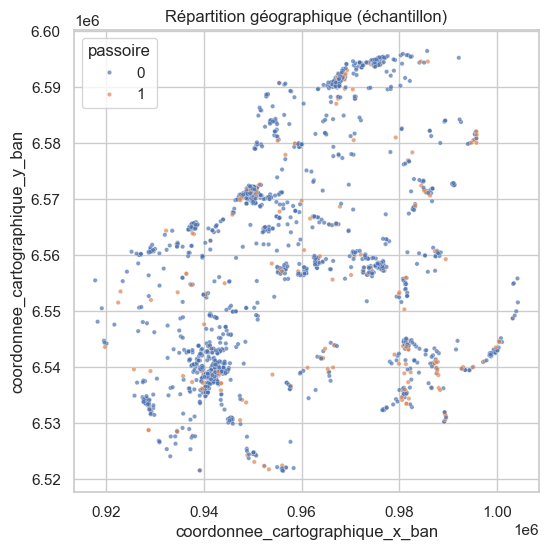

In [6]:
lat_col = 'coordonnee_cartographique_y_ban'
lon_col = 'coordonnee_cartographique_x_ban'
if lat_col in df.columns and lon_col in df.columns:
    sub = df[[lon_col, lat_col, 'passoire']].dropna().sample(min(2000, len(df.dropna(subset=[lon_col, lat_col]))))
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=sub, x=lon_col, y=lat_col, hue='passoire', s=10, alpha=0.7)
    plt.title('R√©partition g√©ographique (√©chantillon)')
    plt.show()
else:
    print('Colonnes de coordonn√©es non trouv√©es ou manquantes dans le dataset.')


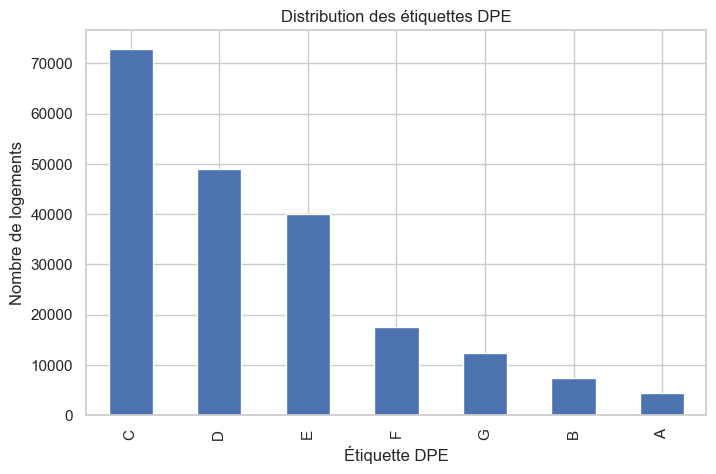

In [7]:
df['etiquette_dpe'].value_counts().plot(kind='bar', figsize=(8,5), title='Distribution des √©tiquettes DPE')
plt.xlabel('√âtiquette DPE') 
plt.ylabel('Nombre de logements')
plt.show()

## Partie 1 : Pr√©paration des donn√©es et identification des variables cibles

### 1.1 Identification de la variable de consommation √©lectrique

Nous allons d'abord identifier les colonnes li√©es √† la consommation √©lectrique pour notre mod√®le de r√©gression.

In [8]:
# Recherche des colonnes li√©es √† la consommation
conso_cols = [col for col in df.columns if 'conso' in col.lower()]
print('Colonnes de consommation disponibles:')
for col in conso_cols:
    print(f"  - {col}")
    
# Afficher statistiques pour les colonnes de consommation num√©riques
print('\n--- Statistiques des colonnes de consommation ---')
for col in conso_cols:
    if df[col].dtype in ['float64', 'int64']:
        print(f"\n{col}:")
        print(f"  Valeurs manquantes: {df[col].isna().sum()} ({df[col].isna().mean()*100:.2f}%)")
        print(f"  Min: {df[col].min():.2f}, Max: {df[col].max():.2f}, Moyenne: {df[col].mean():.2f}")

Colonnes de consommation disponibles:
  - conso_chauffage_installation_chauffage_n1
  - conso_auxiliaires_ep
  - conso_auxiliaires_ef
  - conso_5_usages_par_m2_ep
  - conso_ecs_ef_energie_n1
  - conso_5_usages_par_m2_ef
  - conso_chauffage_ef_energie_n1
  - conso_chauffage_generateur_n1_installation_n1
  - conso_5_usages_ef
  - conso_5_usages_ef_energie_n1
  - conso_5_usages_ep
  - conso_chauffage_ef
  - conso_ecs_ep
  - conso_ecs_ef
  - conso_ef_installation_ecs_n1
  - conso_refroidissement_ef
  - conso_eclairage_ef
  - conso_ef_generateur_n1_ecs_n1
  - conso_chauffage_ep
  - conso_eclairage_ep
  - conso_refroidissement_ep
  - conso_ecs_ef_energie_n3
  - conso_ecs_ef_energie_n2
  - conso_chauffage_ef_energie_n2
  - conso_chauffage_ef_energie_n3
  - conso_5_usages_ef_energie_n3
  - conso_5_usages_ef_energie_n2
  - conso_chauffage_generateur_n2_installation_n1
  - conso_chauffage_generateur_n1_installation_n2
  - conso_chauffage_installation_chauffage_n2
  - conso_refroidissement_annuel

### 1.2 Identification des variables explicatives pertinentes

Nous allons identifier les variables potentiellement importantes pour nos mod√®les :
- Variables g√©ographiques (zone climatique, altitude, coordonn√©es)
- Caract√©ristiques du logement (surface, ann√©e de construction, isolation, etc.)
- Caract√©ristiques √©nerg√©tiques (type de chauffage, isolation, etc.)

In [9]:
# Recherche de colonnes cl√©s pour l'analyse
keywords = {
    'g√©ographique': ['altitude', 'zone', 'climat', 'region', 'coordonnee'],
    'logement': ['surface', 'annee', 'construction', 'niveau', 'hauteur'],
    'isolation': ['isolation', 'menuiserie', 'mur', 'toiture', 'plancher', 'enveloppe'],
    'chauffage': ['chauffage', 'generateur', 'energie', 'emetteur'],
    'ecs': ['ecs', 'eau_chaude'],
    'dpe': ['dpe', 'etiquette', 'classe', 'emission', 'ges']
}

print("=== Variables disponibles par cat√©gorie ===\n")
variables_interessantes = []
for categorie, mots_cles in keywords.items():
    cols = []
    for mot in mots_cles:
        cols.extend([c for c in df.columns if mot.lower() in c.lower() and c not in cols])
    print(f"\n{categorie.upper()} ({len(cols)} colonnes):")
    for col in cols[:15]:  # Limite √† 15 pour lisibilit√©
        variables_interessantes.append(col)
        taux_manquant = df[col].isna().mean() * 100
        print(f"  - {col} (manquants: {taux_manquant:.1f}%)")

=== Variables disponibles par cat√©gorie ===


G√âOGRAPHIQUE (8 colonnes):
  - classe_altitude (manquants: 10.9%)
  - altitude_moyenne (manquants: 0.0%)
  - zone_climatique (manquants: 10.9%)
  - type_energie_climatisation (manquants: 98.4%)
  - surface_climatisee (manquants: 98.3%)
  - code_region_ban (manquants: 0.0%)
  - coordonnee_cartographique_x_ban (manquants: 0.0%)
  - coordonnee_cartographique_y_ban (manquants: 0.0%)

LOGEMENT (14 colonnes):
  - surface_chauffee_installation_chauffage_n1 (manquants: 18.8%)
  - surface_habitable_desservie_par_installation_ecs_n1 (manquants: 18.9%)
  - surface_habitable_logement (manquants: 2.8%)
  - surface_chauffee_installation_chauffage_n2 (manquants: 85.4%)
  - surface_climatisee (manquants: 98.3%)
  - surface_habitable_immeuble (manquants: 36.1%)
  - surface_ventilee (manquants: 96.5%)
  - surface_totale_capteurs_pv (manquants: 99.3%)
  - surface_tertiaire_immeuble (manquants: 99.9%)
  - annee_construction (manquants: 42.6%)
  - periode_con

## Partie 2 : Pr√©traitement et s√©lection des features

### 2.1 Pr√©paration du dataset pour la mod√©lisation

Nous allons :
1. S√©parer les variables num√©riques et cat√©gorielles
2. G√©rer les valeurs manquantes
3. Cr√©er un ensemble de features potentielles

In [10]:
# Imports suppl√©mentaires pour la mod√©lisation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, mutual_info_regression, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [11]:
# D√©finir la cible pour la r√©gression (consommation √©lectrique)
# Choisissons une variable de consommation appropri√©e
target_regression = 'conso_5_usages_ep'  # Consommation 5 usages en √©nergie primaire

# V√©rifier la disponibilit√© de la cible
print(f"Target r√©gression : {target_regression}")
print(f"Valeurs manquantes : {df[target_regression].isna().sum()} ({df[target_regression].isna().mean()*100:.2f}%)")
print(f"Statistiques :\n{df[target_regression].describe()}")

# Cr√©er un dataframe de travail sans les lignes o√π la cible est manquante
df_work = df[df[target_regression].notna() & df['passoire'].notna()].copy()
print(f"\nDataset de travail : {df_work.shape}")

Target r√©gression : conso_5_usages_ep
Valeurs manquantes : 5 (0.00%)
Statistiques :
count    2.037920e+05
mean     2.164666e+04
std      5.589591e+04
min      3.141000e+02
25%      6.977575e+03
50%      1.131610e+04
75%      1.956080e+04
max      5.957086e+06
Name: conso_5_usages_ep, dtype: float64

Dataset de travail : (203792, 237)


In [12]:
# S√©lectionner les colonnes potentiellement utiles
# On exclut les colonnes li√©es √† la cible (consommation, √©mission, DPE, co√ªts)
# ET les calculs interm√©diaires du DPE (besoins, d√©perditions) qui sont des fuites
colonnes_a_exclure = ['conso', 'emission', 'cout', 'etiquette_dpe', 'etiquette_ges',
                      'date_', 'passoire', '_rand', '_geopoint',
                      'besoin_', 'deperdition',  # Calculs interm√©diaires DPE
                      'methode_application_dpe', 'modele_dpe',  # Variables administratives/techniques DPE
                      'surface_chauffee_installation_chauffage_n1',  # VIF > 10 (multicolin√©arit√©)
                      'surface_habitable_desservie_par_installation_ecs_n1']  # VIF > 10 (multicolin√©arit√©)

# Cr√©er liste des features candidates
features_candidates = []
for col in df_work.columns:
    # Exclure les colonnes li√©es aux r√©sultats
    if not any(exclu in col.lower() for exclu in colonnes_a_exclure):
        features_candidates.append(col)

print(f"Nombre de features candidates : {len(features_candidates)}")
print(f"\nPremi√®res features : {features_candidates[:20]}")

Nombre de features candidates : 141

Premi√®res features : ['configuration_installation_chauffage_n1', 'type_generateur_n1_ecs_n1', 'numero_voie_ban', 'score_ban', 'statut_geocodage', 'ventilation_posterieure_2012', 'description_installation_chauffage_n1', 'presence_brasseur_air', 'qualite_isolation_menuiseries', 'isolation_toiture', 'qualite_isolation_enveloppe', 'type_energie_n1', 'code_postal_ban', 'code_insee_ban', 'code_region_ban', 'volume_stockage_generateur_n1_ecs_n1', 'version_dpe', 'coordonnee_cartographique_x_ban', 'type_generateur_chauffage_principal', 'type_energie_principale_ecs']


In [13]:
# S√©parer variables num√©riques et cat√©gorielles
numeric_features = []
categorical_features = []

for col in features_candidates:
    if df_work[col].dtype in ['float64', 'int64']:
        # V√©rifier si pas trop de valeurs manquantes (< 50%)
        if df_work[col].isna().mean() < 0.5:
            numeric_features.append(col)
    elif df_work[col].dtype == 'object':
        # Pour les cat√©gorielles, garder celles avec peu de modalit√©s et peu de manquants
        n_unique = df_work[col].nunique()
        if n_unique < 50 and df_work[col].isna().mean() < 0.5:
            categorical_features.append(col)

print(f"Variables num√©riques s√©lectionn√©es : {len(numeric_features)}")
print(f"Variables cat√©gorielles s√©lectionn√©es : {len(categorical_features)}")
print(f"\nExemples de variables num√©riques : {numeric_features[:10]}")
print(f"\nExemples de variables cat√©gorielles : {categorical_features[:10]}")

Variables num√©riques s√©lectionn√©es : 35
Variables cat√©gorielles s√©lectionn√©es : 29

Exemples de variables num√©riques : ['score_ban', 'ventilation_posterieure_2012', 'presence_brasseur_air', 'isolation_toiture', 'code_postal_ban', 'code_insee_ban', 'code_region_ban', 'volume_stockage_generateur_n1_ecs_n1', 'version_dpe', 'coordonnee_cartographique_x_ban']

Exemples de variables cat√©gorielles : ['configuration_installation_chauffage_n1', 'statut_geocodage', 'qualite_isolation_menuiseries', 'qualite_isolation_enveloppe', 'type_energie_n1', 'type_energie_principale_ecs', 'type_installation_chauffage', 'type_installation_ecs_n1', 'type_emetteur_installation_chauffage_n1', 'configuration_installation_ecs_n1']


### Analyse approfondie de la s√©lection des variables

Avant de proc√©der √† la s√©lection automatique, nous allons analyser en d√©tail la pertinence des variables selon les meilleures pratiques :

1. **V√©rification des variables cl√©s recommand√©es** (structure, isolation, chauffage, ECS, climat)
2. **Analyse des corr√©lations** avec la cible (r√©gression)
3. **Tests statistiques Chi-2** pour les variables cat√©gorielles (classification)
4. **D√©tection de la multicolin√©arit√©** (VIF)

In [14]:
# ========================================
# 1. V√âRIFICATION DES VARIABLES CL√âS RECOMMAND√âES
# ========================================

variables_cles = {
    'structure': ['surface_habitable', 'nombre_niveau', 'hauteur_sous_plafond', 
                  'periode_construction', 'annee_construction', 'volume_stockage', 'type_batiment',
                  'numero_etage', 'logement_traversant'],
    'isolation': ['qualite_isolation_enveloppe', 'qualite_isolation_murs', 
                  'qualite_isolation_menuiseries', 'qualite_isolation_plancher_bas',
                  'qualite_isolation_plancher_haut', 'ubat', 'deperdition'],
    'chauffage': ['type_generateur_chauffage', 'type_energie_principale_chauffage',
                  'type_emetteur', 'besoin_chauffage', 'type_installation_chauffage'],
    'ecs': ['type_generateur_n1_ecs', 'type_energie_principale_ecs', 'besoin_ecs'],
    'climat': ['zone_climatique', 'classe_altitude', 'altitude_moyenne', 'altitude'],
    'ventilation': ['type_ventilation', 'classe_inertie', 'indicateur_confort']
}

print("="*80)
print("VARIABLES CL√âS RECOMMAND√âES - PR√âSENCE ET QUALIT√â")
print("="*80)

variables_trouvees = {}

for categorie, vars_list in variables_cles.items():
    print(f"\n{'‚îÄ'*80}")
    print(f"{categorie.upper()}")
    print(f"{'‚îÄ'*80}")
    
    variables_trouvees[categorie] = []
    
    for var_pattern in vars_list:
        matching = [c for c in df_work.columns if var_pattern.lower() in c.lower() 
                   and not any(exclu in c.lower() for exclu in ['conso', 'emission', 'cout', 'etiquette'])]
        
        if matching:
            for var in matching:
                missing_pct = df_work[var].isna().mean() * 100
                dtype = df_work[var].dtype
                n_unique = df_work[var].nunique() if dtype == 'object' else '-'
                
                status = "‚úì" if missing_pct < 50 else "‚ö†"
                print(f"  {status} {var:50s} | Manquants: {missing_pct:5.1f}% | Type: {str(dtype):10s} | Modalit√©s: {n_unique}")
                
                if missing_pct < 50:  # Garder seulement si < 50% de manquants
                    variables_trouvees[categorie].append(var)
        else:
            print(f"  ‚úó Pattern '{var_pattern}' non trouv√©")

print(f"\n{'='*80}")
print(f"R√âSUM√â: {sum(len(v) for v in variables_trouvees.values())} variables cl√©s disponibles")
print(f"{'='*80}")

VARIABLES CL√âS RECOMMAND√âES - PR√âSENCE ET QUALIT√â

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
STRUCTURE
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
  ‚úì surface_habitable_desservie_par_installation_ecs_n1 | Manquants:  18.9% | Type: float64    | Modalit√©s: -
  ‚úì surface_habitable_logement                         | Manquants:   2.8% | Type: float64    | Modalit√©s: -
  ‚úì surface_habitable_immeuble                         | Manquants:  36.1% | Type: float64    | Modalit√©s: -
  ‚úì nombre_niveau_logement                             | Manquants:   6.5% | Type: float64    | Modalit√©s: -
  ‚ö


TOP CORR√âLATIONS AVEC LA CONSOMMATION √âLECTRIQUE

Top 30 corr√©lations (valeur absolue) :
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
 1. surface_habitable_logement                         | r = +0.7125 (‚Üë Positive)
 2. surface_ventilee                                   | r = +0.5977 (‚Üë Positive)
 3. volume_stockage_generateur_n2_ecs_n1               | r = +0.4043 (‚Üë Positive)
 4. logement_traversant                                | r = +0.2789 (‚Üë Positive)
 5. apport_interne_saison_chauffe                      | r = +0.2728 (‚Üë Positive)
 6. facteur_couverture_solaire_installation_chauffage_n2 | r = -0.2535 (‚Üì N√©gative)
 7. surface_climatisee                                 | r = +0.2378 (‚Üë Positive)
 8. apport_solaire_saison_chauffe                      | r = +0.2197 (‚Üë P

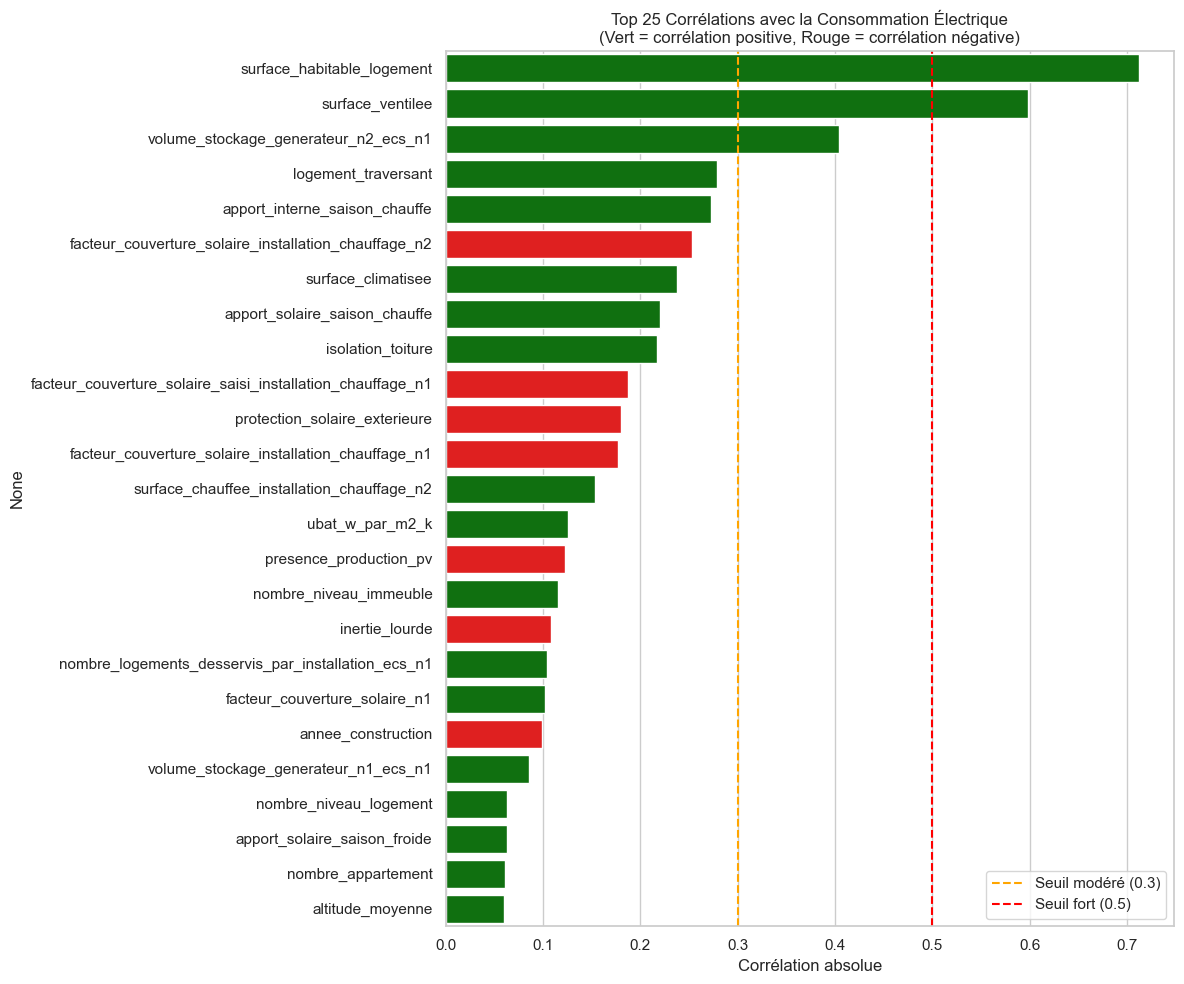


‚úì Variables avec corr√©lation > 0.3: 3
‚úì Variables avec corr√©lation > 0.5: 2


In [15]:
# ========================================
# 2. CORR√âLATIONS AVEC LA CIBLE (R√âGRESSION)
# ========================================

print("\n" + "="*80)
print("TOP CORR√âLATIONS AVEC LA CONSOMMATION √âLECTRIQUE")
print("="*80)

# Identifier les colonnes num√©riques (excluant les fuites de donn√©es)
numeric_cols_for_corr = [c for c in df_work.select_dtypes(include=[np.number]).columns 
                         if not any(exclu in c.lower() for exclu in ['conso', 'emission', 'cout', 'etiquette_dpe', 'etiquette_ges',
                                                                       'passoire', 'besoin_', 'deperdition',
                                                                       'methode_application_dpe', 'modele_dpe',
                                                                       'surface_chauffee_installation_chauffage_n1',
                                                                       'surface_habitable_desservie_par_installation_ecs_n1'])]  # Exclusion calculs DPE + variables admin + VIF > 10

# Calculer les corr√©lations avec la cible
correlations = df_work[numeric_cols_for_corr].corrwith(df_work[target_regression]).abs().sort_values(ascending=False)

# Afficher les top 30
print("\nTop 30 corr√©lations (valeur absolue) :")
print("‚îÄ"*80)
for i, (var, corr) in enumerate(correlations.head(30).items(), 1):
    corr_signed = df_work[var].corr(df_work[target_regression])
    direction = "‚Üë Positive" if corr_signed > 0 else "‚Üì N√©gative"
    print(f"{i:2d}. {var:50s} | r = {corr_signed:+.4f} ({direction})")

# Visualisation
plt.figure(figsize=(12, 10))
top_corr = correlations.head(25)
colors = ['green' if df_work[var].corr(df_work[target_regression]) > 0 else 'red' 
          for var in top_corr.index]
sns.barplot(x=top_corr.values, y=top_corr.index, palette=colors)
plt.title('Top 25 Corr√©lations avec la Consommation √âlectrique\n(Vert = corr√©lation positive, Rouge = corr√©lation n√©gative)')
plt.xlabel('Corr√©lation absolue')
plt.axvline(x=0.3, color='orange', linestyle='--', label='Seuil mod√©r√© (0.3)')
plt.axvline(x=0.5, color='red', linestyle='--', label='Seuil fort (0.5)')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\n‚úì Variables avec corr√©lation > 0.3: {(correlations > 0.3).sum()}")
print(f"‚úì Variables avec corr√©lation > 0.5: {(correlations > 0.5).sum()}")


TEST CHI-2 POUR LA PR√âDICTION DES PASSOIRES √âNERG√âTIQUES

Analyse de 29 variables cat√©gorielles...

Top 20 variables cat√©gorielles les plus discriminantes :
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
qualite_isolation_enveloppe                        | Chi2 =   20033.54 | p-value = 0.00e+00 ***
configuration_installation_ecs_n1                  | Chi2 =   11331.49 | p-value = 0.00e+00 ***
zone_climatique                                    | Chi2 =   10567.75 | p-value = 0.00e+00 ***
periode_construction                               | Chi2 =   10349.45 | p-value = 0.00e+00 ***
type_energie_generateur_n1_installation_n1         | Chi2 =   10299.21 | p-value = 0.00e+00 ***
type_installation_solaire_n1                       | Chi2 =    7886.34 | p-value = 0.00e+00 ***
qualite_isolation_mu

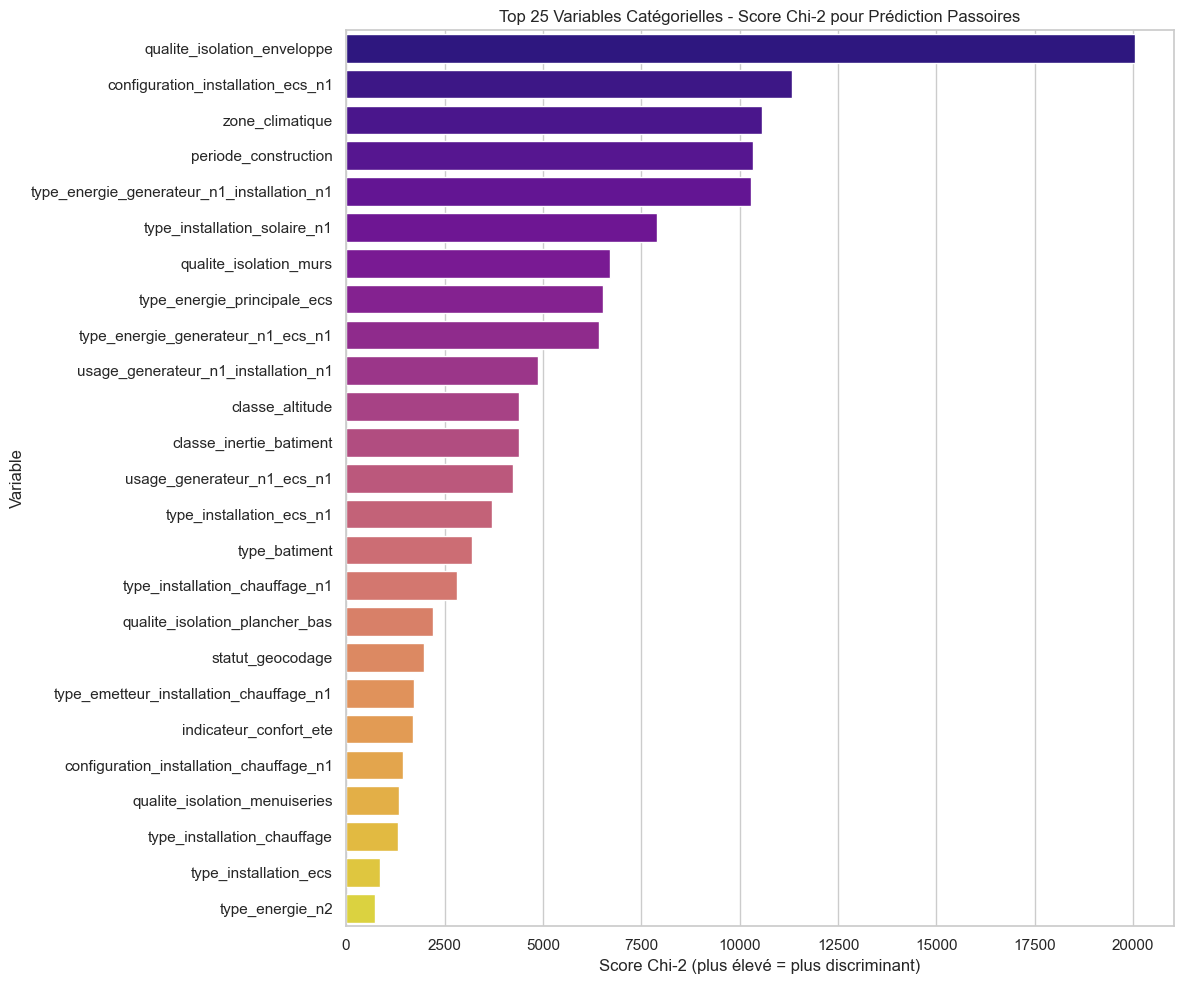


‚úì Variables significatives (p < 0.05): 27
‚úì Variables tr√®s significatives (p < 0.001): 27


In [16]:
# ========================================
# 3. TEST CHI-2 POUR VARIABLES CAT√âGORIELLES (CLASSIFICATION)
# ========================================

from sklearn.feature_selection import chi2

print("\n" + "="*80)
print("TEST CHI-2 POUR LA PR√âDICTION DES PASSOIRES √âNERG√âTIQUES")
print("="*80)

# Encoder les variables cat√©gorielles pour le test Chi-2
categorical_for_chi2 = [col for col in categorical_features if col in df_work.columns]

if len(categorical_for_chi2) > 0:
    print(f"\nAnalyse de {len(categorical_for_chi2)} variables cat√©gorielles...\n")
    
    # Encoder les cat√©gorielles (factorize convertit en entiers)
    categorical_encoded = pd.DataFrame()
    for col in categorical_for_chi2:
        categorical_encoded[col] = pd.factorize(df_work[col].fillna('MISSING'))[0]
    
    # Test Chi-2
    chi2_scores, p_values = chi2(categorical_encoded, df_work['passoire'])
    
    # Cr√©er un DataFrame des r√©sultats
    chi2_df = pd.DataFrame({
        'Variable': categorical_for_chi2,
        'Chi2_Score': chi2_scores,
        'P_Value': p_values
    }).sort_values('Chi2_Score', ascending=False)
    
    # Afficher les top 20
    print("Top 20 variables cat√©gorielles les plus discriminantes :")
    print("‚îÄ"*80)
    for i, row in chi2_df.head(20).iterrows():
        significance = "***" if row['P_Value'] < 0.001 else "**" if row['P_Value'] < 0.01 else "*" if row['P_Value'] < 0.05 else ""
        print(f"{row['Variable']:50s} | Chi2 = {row['Chi2_Score']:10.2f} | p-value = {row['P_Value']:.2e} {significance}")
    
    print("\n*** p < 0.001 (tr√®s significatif), ** p < 0.01, * p < 0.05")
    
    # Visualisation
    plt.figure(figsize=(12, 10))
    top_chi2 = chi2_df.head(25)
    sns.barplot(data=top_chi2, y='Variable', x='Chi2_Score', palette='plasma')
    plt.title('Top 25 Variables Cat√©gorielles - Score Chi-2 pour Pr√©diction Passoires')
    plt.xlabel('Score Chi-2 (plus √©lev√© = plus discriminant)')
    plt.tight_layout()
    plt.show()
    
    print(f"\n‚úì Variables significatives (p < 0.05): {(chi2_df['P_Value'] < 0.05).sum()}")
    print(f"‚úì Variables tr√®s significatives (p < 0.001): {(chi2_df['P_Value'] < 0.001).sum()}")
else:
    print("‚ö† Aucune variable cat√©gorielle disponible pour le test Chi-2")


D√âTECTION DE LA MULTICOLIN√âARIT√â (VIF - Variance Inflation Factor)

Crit√®res d'interpr√©tation :
  ‚Ä¢ VIF < 5   : Pas de multicolin√©arit√©
  ‚Ä¢ VIF 5-10  : Multicolin√©arit√© mod√©r√©e
  ‚Ä¢ VIF > 10  : Multicolin√©arit√© forte (variable redondante)

Calcul sur un √©chantillon de 5000 observations...
Analyse de 33 variables num√©riques...

Variables avec FORTE multicolin√©arit√© (VIF > 10) :
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
‚úì Aucune variable avec VIF > 10

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Variables avec multicolin√©arit√© MOD√âR√âE (5 < VIF < 10) :
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

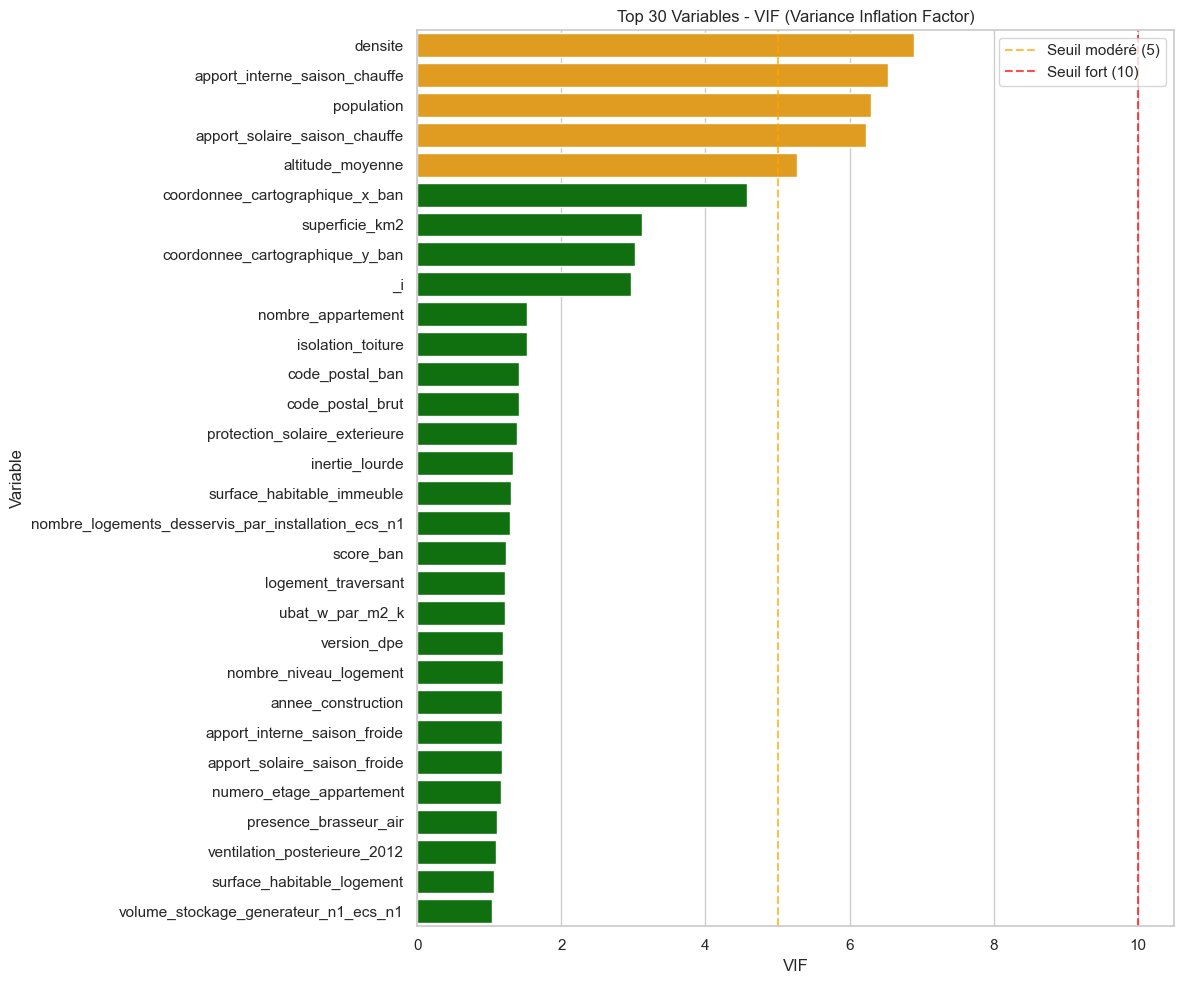


RECOMMANDATIONS
‚úì Pas de probl√®me majeur de multicolin√©arit√©


In [17]:
# ========================================
# 4. D√âTECTION DE LA MULTICOLIN√âARIT√â (VIF)
# ========================================

from statsmodels.stats.outliers_influence import variance_inflation_factor

print("\n" + "="*80)
print("D√âTECTION DE LA MULTICOLIN√âARIT√â (VIF - Variance Inflation Factor)")
print("="*80)

print("\nCrit√®res d'interpr√©tation :")
print("  ‚Ä¢ VIF < 5   : Pas de multicolin√©arit√©")
print("  ‚Ä¢ VIF 5-10  : Multicolin√©arit√© mod√©r√©e")
print("  ‚Ä¢ VIF > 10  : Multicolin√©arit√© forte (variable redondante)\n")

# Prendre un √©chantillon pour acc√©l√©rer le calcul
sample_size = min(5000, len(df_work))
print(f"Calcul sur un √©chantillon de {sample_size} observations...")

# S√©lectionner les variables num√©riques pertinentes
numeric_for_vif = [col for col in numeric_features if col in df_work.columns][:50]  # Limiter √† 50 pour la rapidit√©

if len(numeric_for_vif) > 2:
    # √âchantillonner et imputer
    X_vif = df_work[numeric_for_vif].sample(n=sample_size, random_state=42)
    X_vif_filled = X_vif.fillna(X_vif.median())
    
    # Retirer les colonnes avec variance nulle
    X_vif_filled = X_vif_filled.loc[:, X_vif_filled.std() > 0]
    
    print(f"Analyse de {len(X_vif_filled.columns)} variables num√©riques...\n")
    
    # Calculer les VIF
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_vif_filled.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif_filled.values, i) 
                       for i in range(len(X_vif_filled.columns))]
    vif_data = vif_data.sort_values('VIF', ascending=False)
    
    # Afficher les variables avec forte multicolin√©arit√©
    print("Variables avec FORTE multicolin√©arit√© (VIF > 10) :")
    print("‚îÄ"*80)
    high_vif = vif_data[vif_data['VIF'] > 10]
    if len(high_vif) > 0:
        for i, row in high_vif.iterrows():
            print(f"‚ö† {row['Variable']:50s} | VIF = {row['VIF']:8.2f}")
        print(f"\n‚ö† {len(high_vif)} variables avec forte multicolin√©arit√© d√©tect√©es")
        print("‚Üí Consid√©rer la suppression de ces variables ou utiliser PCA/r√©gularisation")
    else:
        print("‚úì Aucune variable avec VIF > 10")
    
    # Afficher les variables avec multicolin√©arit√© mod√©r√©e
    print("\n" + "‚îÄ"*80)
    print("Variables avec multicolin√©arit√© MOD√âR√âE (5 < VIF < 10) :")
    print("‚îÄ"*80)
    moderate_vif = vif_data[(vif_data['VIF'] > 5) & (vif_data['VIF'] <= 10)]
    if len(moderate_vif) > 0:
        for i, row in moderate_vif.head(15).iterrows():
            print(f"  {row['Variable']:50s} | VIF = {row['VIF']:8.2f}")
        print(f"\n{len(moderate_vif)} variables avec multicolin√©arit√© mod√©r√©e")
    else:
        print("‚úì Aucune variable avec VIF entre 5 et 10")
    
    # Visualisation
    plt.figure(figsize=(12, 10))
    top_vif = vif_data.head(30)
    colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in top_vif['VIF']]
    sns.barplot(data=top_vif, y='Variable', x='VIF', palette=colors)
    plt.axvline(x=5, color='orange', linestyle='--', alpha=0.7, label='Seuil mod√©r√© (5)')
    plt.axvline(x=10, color='red', linestyle='--', alpha=0.7, label='Seuil fort (10)')
    plt.title('Top 30 Variables - VIF (Variance Inflation Factor)')
    plt.xlabel('VIF')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Recommandations
    print("\n" + "="*80)
    print("RECOMMANDATIONS")
    print("="*80)
    if len(high_vif) > 0:
        print(f"‚ö† {len(high_vif)} variables redondantes d√©tect√©es (VIF > 10)")
        print("  ‚Üí Options: supprimer, utiliser PCA, ou r√©gularisation (Lasso, Ridge)")
    else:
        print("‚úì Pas de probl√®me majeur de multicolin√©arit√©")
else:
    print("‚ö† Pas assez de variables num√©riques pour le calcul du VIF")

In [18]:
# ========================================
# 5. ANALYSE SP√âCIFIQUE : ALTITUDE ET ZONE CLIMATIQUE
# ========================================

print("\n" + "="*80)
print("ANALYSE SP√âCIFIQUE SAVOIE (74) - IMPACT ALTITUDE ET CLIMAT")
print("="*80)

# Rechercher les colonnes li√©es √† l'altitude et au climat
altitude_cols = [col for col in df_work.columns if 'altitude' in col.lower()]
climat_cols = [col for col in df_work.columns if 'climat' in col.lower() or 'zone' in col.lower()]

print("\n1. Variables d'ALTITUDE disponibles :")
print("‚îÄ"*80)
for col in altitude_cols:
    if col in numeric_cols_for_corr:
        corr_conso = df_work[col].corr(df_work[target_regression])
        missing = df_work[col].isna().mean() * 100
        print(f"  {col:40s} | Corr√©lation: {corr_conso:+.4f} | Manquants: {missing:.1f}%")
        
        # Statistiques descriptives
        print(f"    ‚Üí Min: {df_work[col].min():.0f}m, Max: {df_work[col].max():.0f}m, Moyenne: {df_work[col].mean():.0f}m")

print("\n2. Variables de ZONE CLIMATIQUE disponibles :")
print("‚îÄ"*80)
for col in climat_cols:
    missing = df_work[col].isna().mean() * 100
    n_unique = df_work[col].nunique()
    print(f"  {col:40s} | Modalit√©s: {n_unique:3d} | Manquants: {missing:.1f}%")

# Analyse de la distribution de l'altitude si disponible
if altitude_cols:
    # Identifier la colonne num√©rique d'altitude (pas la classe cat√©gorielle)
    numeric_altitude_col = None
    for col in altitude_cols:
        if df_work[col].dtype in ['float64', 'int64']:
            numeric_altitude_col = col
            break
    
    if numeric_altitude_col is None:
        print("‚ö†Ô∏è Aucune colonne d'altitude num√©rique trouv√©e")
        print(f"Colonnes disponibles: {altitude_cols}")
    else:
        main_altitude_col = numeric_altitude_col
        print(f"\n‚úì Colonne d'altitude utilis√©e: {main_altitude_col}")
        
        # S'assurer que l'altitude est num√©rique
        altitude_data = pd.to_numeric(df_work[main_altitude_col], errors='coerce')
        
        # Cr√©er un DataFrame propre pour l'analyse
        df_altitude_clean = pd.DataFrame({
            'altitude': altitude_data,
            'conso': df_work[target_regression]
        }).dropna()
        
        if len(df_altitude_clean) > 0:
            print(f"‚úì {len(df_altitude_clean)} observations valides pour l'analyse graphique")
            
            # Distribution de l'altitude
            fig, axes = plt.subplots(1, 3, figsize=(16, 5))
            
            # Subplot 1: Histogramme
            axes[0].hist(df_altitude_clean['altitude'], bins=50, edgecolor='black')
            axes[0].set_title(f'Distribution de {main_altitude_col}')
            axes[0].set_xlabel('Altitude (m)')
            axes[0].set_ylabel('Nombre de logements')
            
            # Subplot 2: Boxplot par tranche d'altitude
            try:
                df_altitude_clean['altitude_bin'] = pd.cut(df_altitude_clean['altitude'], bins=5)
                sns.boxplot(data=df_altitude_clean, x='altitude_bin', y='conso', ax=axes[1])
                axes[1].set_title('Consommation par tranche d\'altitude')
                axes[1].set_xlabel('Altitude (m)')
                axes[1].set_ylabel('Consommation (kWh/m¬≤/an)')
                axes[1].tick_params(axis='x', rotation=45)
            except Exception as e:
                axes[1].text(0.5, 0.5, f'Erreur boxplot:\n{str(e)}', 
                            ha='center', va='center', transform=axes[1].transAxes)
                axes[1].set_title('Consommation par tranche d\'altitude (erreur)')
            
            # Subplot 3: Scatter plot
            axes[2].scatter(df_altitude_clean['altitude'], df_altitude_clean['conso'], alpha=0.3, s=1)
            axes[2].set_xlabel('Altitude (m)')
            axes[2].set_ylabel('Consommation (kWh/m¬≤/an)')
            correlation = df_altitude_clean['altitude'].corr(df_altitude_clean['conso'])
            axes[2].set_title(f'Corr√©lation: {correlation:.4f}')
            
            plt.tight_layout()
            plt.show()
            
            # Analyse par tranches d'altitude
            print("\n3. Consommation moyenne par TRANCHE D'ALTITUDE :")
            print("‚îÄ"*80)
            
            # Cr√©er les tranches avec les donn√©es propres
            df_altitude_clean['altitude_tranches'] = pd.cut(
                df_altitude_clean['altitude'], 
                bins=[0, 400, 600, 800, 1000, 3000], 
                labels=['< 400m', '400-600m', '600-800m', '800-1000m', '> 1000m']
            )
            
            # Joindre avec la colonne passoire
            df_for_groupby = df_altitude_clean.copy()
            df_for_groupby['passoire'] = df_work.loc[df_altitude_clean.index, 'passoire']
            
            altitude_analysis = df_for_groupby.groupby('altitude_tranches', observed=True).agg({
                'conso': ['mean', 'median', 'count'],
                'passoire': 'mean'
            }).round(2)
            
            altitude_analysis.columns = ['Conso_Moyenne', 'Conso_M√©diane', 'Nb_Logements', 'Taux_Passoires']
            print(altitude_analysis)
            
            print("\n‚Üí En Haute-Savoie, l'altitude est un facteur MAJEUR de consommation √©nerg√©tique")
            print("‚Üí Plus l'altitude augmente, plus les besoins en chauffage sont importants")
        else:
            print("‚ö†Ô∏è Aucune donn√©e valide pour cr√©er les graphiques d'altitude")


ANALYSE SP√âCIFIQUE SAVOIE (74) - IMPACT ALTITUDE ET CLIMAT

1. Variables d'ALTITUDE disponibles :
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
  altitude_moyenne                         | Corr√©lation: +0.0599 | Manquants: 0.0%
    ‚Üí Min: 335m, Max: 2445m, Moyenne: 742m

2. Variables de ZONE CLIMATIQUE disponibles :
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
  zone_climatique                          | Modalit√©s:   9 | Manquants: 10.9%
  type_energie_climatisation               | Modalit√©s:   2 | Manquants: 98.4%
  surface_climatisee                       | Modalit√©s: 1345 | Manquants: 98.3%



3. Consommation moyenne par TRANCHE D'ALTITUDE :
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                   Conso_Moyenne  Conso_M√©diane  Nb_Logements  Taux_Passoires
altitude_tranches                                                            
< 400m                  19140.45        9450.50          5280            0.07
400-600m                19757.03       10554.40        119734            0.11
600-800m                20241.17       11085.80         28814            0.13
800-1000m               24212.95       15078.30          9462            0.18
> 1000m                 27959.99       13591.15         40502            0.26

‚Üí En Haute-Savoie, l'altitude est un facteur MAJEUR de consommation √©nerg√©tique
‚Üí Plus l'altitude augmente, plus les besoins en chauffage sont importants


In [19]:
# ========================================
# 6. S√âLECTION INTELLIGENTE DES FEATURES BAS√âE SUR LES ANALYSES
# ========================================

print("\n" + "="*80)
print("S√âLECTION INTELLIGENTE DES FEATURES (Bas√©e sur analyses statistiques)")
print("="*80)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# √âTAPE 1 : Identifier les features √† EXCLURE (VIF > 10)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
features_to_exclude_vif = []
if 'vif_data' in locals() and len(vif_data) > 0:
    high_vif_vars = vif_data[vif_data['VIF'] > 10]['Variable'].tolist()
    features_to_exclude_vif.extend(high_vif_vars)
    print(f"\n‚ö† Variables exclues (VIF > 10): {len(features_to_exclude_vif)}")
    for var in features_to_exclude_vif[:10]:
        print(f"  - {var}")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# √âTAPE 2 : S√©lectionner les MEILLEURES features NUM√âRIQUES (corr√©lation)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
selected_numeric_smart = []
if 'correlations' in locals():
    # SEUIL AJUST√â : 0.10 pour capturer plus de variables pertinentes
    # (0.15 √©tait trop restrictif et ne donnait que 6 variables)
    CORRELATION_THRESHOLD = 0.10
    
    # Prendre les variables avec corr√©lation > seuil
    strong_corr_vars = correlations[correlations > CORRELATION_THRESHOLD].index.tolist()
    
    # Exclure celles avec VIF trop √©lev√©
    selected_numeric_smart = [v for v in strong_corr_vars 
                              if v not in features_to_exclude_vif 
                              and v in numeric_features]
    
    print(f"\n‚úì Variables num√©riques s√©lectionn√©es (corr√©lation > {CORRELATION_THRESHOLD}, VIF OK): {len(selected_numeric_smart)}")
    
    # Afficher les d√©tails pour transparence
    print(f"\n  D√©tail de la s√©lection:")
    for i, var in enumerate(selected_numeric_smart, 1):
        corr_val = df_work[var].corr(df_work[target_regression])
        print(f"    {i:2d}. {var:50s} | r = {corr_val:+.4f}")
    
    # Afficher les variables exclues pour transparence
    excluded_corr_vars = [v for v in strong_corr_vars if v not in selected_numeric_smart]
    if excluded_corr_vars:
        print(f"\n  ‚ö† Variables avec bonne corr√©lation mais EXCLUES ({len(excluded_corr_vars)}):")
        for var in excluded_corr_vars[:10]:
            corr_val = df_work[var].corr(df_work[target_regression])
            if var in features_to_exclude_vif:
                reason = "VIF > 10"
            else:
                reason = "Filtrage initial (manquants ou hors numeric_features)"
            print(f"      ‚Ä¢ {var:45s} | r = {corr_val:+.4f} | Raison: {reason}")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# √âTAPE 3 : S√©lectionner les MEILLEURES features CAT√âGORIELLES (Chi-2)
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
selected_categorical_smart = []
if 'chi2_df' in locals() and len(chi2_df) > 0:
    # Prendre les variables significatives (p < 0.05) avec Chi2 √©lev√©
    significant_chi2 = chi2_df[chi2_df['P_Value'] < 0.05].sort_values('Chi2_Score', ascending=False)
    
    # Prendre le top 30 (pour limiter les dimensions apr√®s one-hot encoding)
    selected_categorical_smart = significant_chi2.head(30)['Variable'].tolist()
    selected_categorical_smart = [v for v in selected_categorical_smart if v in categorical_features]
    
    print(f"\n‚úì Variables cat√©gorielles s√©lectionn√©es (p < 0.05, top 30 Chi-2): {len(selected_categorical_smart)}")
    
    # Afficher les d√©tails
    print(f"\n  Top 15 variables cat√©gorielles:")
    for i, row in significant_chi2.head(15).iterrows():
        if row['Variable'] in selected_categorical_smart:
            status = "‚úì"
        else:
            status = "‚úó"
        print(f"    {status} {row['Variable']:50s} | Chi2 = {row['Chi2_Score']:10.2f} | p = {row['P_Value']:.2e}")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# √âTAPE 4 : Combiner et cr√©er la liste finale
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
selected_features_smart = selected_numeric_smart + selected_categorical_smart

print(f"\n{'='*80}")
print(f"R√âSUM√â DE LA S√âLECTION INTELLIGENTE")
print(f"{'='*80}")
print(f"  ‚Ä¢ Variables num√©riques   : {len(selected_numeric_smart):3d}")
print(f"  ‚Ä¢ Variables cat√©gorielles: {len(selected_categorical_smart):3d}")
print(f"  ‚Ä¢ TOTAL                  : {len(selected_features_smart):3d}")
print(f"\n‚Üí Ces features seront utilis√©es pour l'entra√Ænement des mod√®les")

# Sauvegarder pour utilisation ult√©rieure
selected_features_info = {
    'all': selected_features_smart,
    'numeric': selected_numeric_smart,
    'categorical': selected_categorical_smart,
    'excluded_vif': features_to_exclude_vif
}

print(f"\n‚úì S√©lection intelligente termin√©e!")


S√âLECTION INTELLIGENTE DES FEATURES (Bas√©e sur analyses statistiques)

‚ö† Variables exclues (VIF > 10): 0

‚úì Variables num√©riques s√©lectionn√©es (corr√©lation > 0.1, VIF OK): 9

  D√©tail de la s√©lection:
     1. surface_habitable_logement                         | r = +0.7125
     2. logement_traversant                                | r = +0.2789
     3. apport_interne_saison_chauffe                      | r = +0.2728
     4. apport_solaire_saison_chauffe                      | r = +0.2197
     5. isolation_toiture                                  | r = +0.2171
     6. protection_solaire_exterieure                      | r = -0.1802
     7. ubat_w_par_m2_k                                    | r = +0.1260
     8. inertie_lourde                                     | r = -0.1081
     9. nombre_logements_desservis_par_installation_ecs_n1 | r = +0.1038

  ‚ö† Variables avec bonne corr√©lation mais EXCLUES (10):
      ‚Ä¢ surface_ventilee                              | r = +0.5977

#### Visualisation du processus de s√©lection

**Pipeline de s√©lection des features** :

```
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ √âTAPE 1 : Filtrage de base                                     ‚îÇ
‚îÇ ‚Ä¢ < 50% valeurs manquantes                                      ‚îÇ
‚îÇ ‚Ä¢ < 50 modalit√©s (cat√©gorielles)                                ‚îÇ
‚îÇ ‚Ä¢ Exclusion : conso, emission, etiquette_dpe, besoin_, etc.    ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
                            ‚Üì
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ √âTAPE 2 : Analyses statistiques                                ‚îÇ
‚îÇ ‚Ä¢ Corr√©lation Pearson (num√©riques)                             ‚îÇ
‚îÇ ‚Ä¢ Test Chi-2 (cat√©gorielles)                                    ‚îÇ
‚îÇ ‚Ä¢ VIF - D√©tection multicolin√©arit√©                             ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
                            ‚Üì
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ √âTAPE 3 : S√©lection intelligente                               ‚îÇ
‚îÇ ‚Ä¢ Variables num√©riques : corr√©lation > 0.15 ET VIF < 10        ‚îÇ
‚îÇ ‚Ä¢ Variables cat√©gorielles : p-value < 0.05, top 30 Chi-2       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
                            ‚Üì
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ √âTAPE 4 : Entra√Ænement des mod√®les                             ‚îÇ
‚îÇ ‚Ä¢ Random Forest (validation de la s√©lection)                   ‚îÇ
‚îÇ ‚Ä¢ Ridge, Gradient Boosting                                      ‚îÇ
‚îÇ ‚Ä¢ Utilisation DIRECTE des features s√©lectionn√©es                ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
```


In [20]:
# ========================================
# PR√âPARATION DES PIPELINES AVEC FEATURES INTELLIGEMMENT S√âLECTIONN√âES
# ========================================

# V√©rifier si la s√©lection intelligente a √©t√© effectu√©e
if 'selected_features_smart' in locals() and len(selected_features_smart) > 0:
    print("‚úì Utilisation des features s√©lectionn√©es par analyse statistique")
    features_to_use_numeric = selected_numeric_smart
    features_to_use_categorical = selected_categorical_smart
else:
    print("‚ö† S√©lection intelligente non disponible, utilisation de toutes les features")
    features_to_use_numeric = numeric_features
    features_to_use_categorical = categorical_features

# Pipeline de pr√©traitement pour les donn√©es num√©riques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline de pr√©traitement pour les donn√©es cat√©gorielles
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinaison des deux pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_to_use_numeric),
        ('cat', categorical_transformer, features_to_use_categorical)
    ])

print("\n" + "="*80)
print("Pipeline de pr√©traitement cr√©√© avec succ√®s!")
print("="*80)
print(f"  - {len(features_to_use_numeric)} variables num√©riques (corr√©lation valid√©e)")
print(f"  - {len(features_to_use_categorical)} variables cat√©gorielles (Chi-2 valid√©)")
print(f"  - TOTAL: {len(features_to_use_numeric) + len(features_to_use_categorical)} variables")
print("\n‚Üí Ces variables ont √©t√© s√©lectionn√©es sur la base des analyses statistiques")

‚úì Utilisation des features s√©lectionn√©es par analyse statistique

Pipeline de pr√©traitement cr√©√© avec succ√®s!
  - 9 variables num√©riques (corr√©lation valid√©e)
  - 27 variables cat√©gorielles (Chi-2 valid√©)
  - TOTAL: 36 variables

‚Üí Ces variables ont √©t√© s√©lectionn√©es sur la base des analyses statistiques


## Partie 3 : Mod√®le de R√©gression - Pr√©diction de la consommation √©lectrique

### 3.1 Pr√©paration des donn√©es et division Train/Test

In [28]:
# Pr√©paration des donn√©es pour la r√©gression avec features intelligemment s√©lectionn√©es
if 'selected_features_smart' in locals() and len(selected_features_smart) > 0:
    X = df_work[selected_features_smart]
    print("‚úì Utilisation des features s√©lectionn√©es par analyse statistique")
else:
    X = df_work[numeric_features + categorical_features]
    print("‚ö† Utilisation de toutes les features (s√©lection intelligente non disponible)")

y_regression = df_work[target_regression]

# Division train/test (80/20)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_regression, test_size=0.2, random_state=42
)

print(f"\nTaille du jeu d'entra√Ænement : {X_train_reg.shape}")
print(f"Taille du jeu de test : {X_test_reg.shape}")
print(f"Nombre de features utilis√©es : {X.shape[1]}")

‚úì Utilisation des features s√©lectionn√©es par analyse statistique

Taille du jeu d'entra√Ænement : (163033, 36)
Taille du jeu de test : (40759, 36)
Nombre de features utilis√©es : 36


### 3.2 Optimisation des hyperparam√®tres avec GridSearchCV

Les features ont √©t√© s√©lectionn√©es par analyse statistique. Nous allons maintenant optimiser les hyperparam√®tres des mod√®les.

In [29]:
# ========================================
# ENTRA√éNEMENT AVEC LES FEATURES S√âLECTIONN√âES PAR ANALYSE STATISTIQUE
# ========================================
# Les features utilis√©es proviennent des analyses de corr√©lation, Chi-2 et VIF
# Pas de r√©duction suppl√©mentaire, on utilise directement les features valid√©es

print("="*80)
print("PR√âPARATION DES DONN√âES POUR L'ENTRA√éNEMENT")
print("="*80)
print(f"‚úì Features num√©riques utilis√©es: {len(features_to_use_numeric)}")
print(f"‚úì Features cat√©gorielles utilis√©es: {len(features_to_use_categorical)}")
print(f"‚úì TOTAL: {len(features_to_use_numeric) + len(features_to_use_categorical)}")
print("\n‚Üí Ces features ont √©t√© s√©lectionn√©es sur la base des analyses statistiques")
print("‚Üí Aucune r√©duction suppl√©mentaire n'est effectu√©e\n")

# Les donn√©es sont d√©j√† pr√©par√©es (X_train_reg, X_test_reg)
# Le preprocessor est d√©j√† configur√© avec les bonnes features

PR√âPARATION DES DONN√âES POUR L'ENTRA√éNEMENT
‚úì Features num√©riques utilis√©es: 9
‚úì Features cat√©gorielles utilis√©es: 27
‚úì TOTAL: 36

‚Üí Ces features ont √©t√© s√©lectionn√©es sur la base des analyses statistiques
‚Üí Aucune r√©duction suppl√©mentaire n'est effectu√©e



In [30]:
# Le preprocessor a d√©j√† √©t√© cr√©√© avec les features s√©lectionn√©es intelligemment
# Les donn√©es X_train_reg et X_test_reg contiennent d√©j√† les bonnes features

print("‚úì Donn√©es pr√™tes pour l'entra√Ænement des mod√®les")

‚úì Donn√©es pr√™tes pour l'entra√Ænement des mod√®les


In [32]:
# D√©finition des mod√®les et leurs hyperparam√®tres √† tester pour la R√âGRESSION
from xgboost import XGBRegressor

models_regression = {
    'Ridge': {
        'model': Ridge(),
        'params': {
            'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  
            'model__solver': ['auto']  
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(
            random_state=42,
            n_jobs= -1,
            max_features='sqrt'  
            ),
        'params': {
            'model__n_estimators': [50],       
            'model__max_depth': [15, 20],     
            'model__min_samples_split': [5],       
            'model__min_samples_leaf': [2]          
        } # 2 combinaison
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [50],           
            'model__learning_rate': [0.1],    
            'model__max_depth': [3, 5],             
            'model__min_samples_split': [5]         
        } # 2 combinaison
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, tree_method='hist'),
        'params': {
            'model__n_estimators': [50],
            'model__learning_rate': [0.1],
            'model__max_depth': [3, 5],
            'model__min_child_weight': [1, 3],
            'model__reg_alpha': [0.0, 0.1],  # R√©gularisation L1
            'model__reg_lambda': [1.0]       # R√©gularisation L2
        } # 8 combinaisons
    }
}

print("Mod√®les configur√©s pour la r√©gression (param√®tres simplifi√©s) :")
for name in models_regression.keys():
    print(f"  - {name}")


Mod√®les configur√©s pour la r√©gression (param√®tres simplifi√©s) :
  - Ridge
  - RandomForest
  - GradientBoosting
  - XGBoost


In [33]:
# Entra√Ænement et √©valuation des mod√®les de r√©gression
results_regression = {}

for model_name, model_info in models_regression.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model_info['model'])
    ])
    
    grid_search = GridSearchCV(
        pipeline, 
        model_info['params'],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=0  # Aucune sortie pendant l'entra√Ænement
    )
    
    # Entra√Ænement silencieux
    grid_search.fit(X_train_reg, y_train_reg)
    
    # Pr√©dictions sur le jeu de test
    y_pred = grid_search.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    
    results_regression[model_name] = {
        'model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'predictions': y_pred
    }

# Affichage du r√©sum√© final
print("="*80)
print("R√âSUM√â DES R√âSULTATS - R√âGRESSION")
print("="*80)

results_df_reg = pd.DataFrame({
    'Mod√®le': list(results_regression.keys()),
    'RMSE': [results_regression[m]['rmse'] for m in results_regression],
    'MAE': [results_regression[m]['mae'] for m in results_regression],
    'R¬≤': [results_regression[m]['r2'] for m in results_regression]
}).sort_values('R¬≤', ascending=False)

print(results_df_reg.to_string(index=False))


R√âSUM√â DES R√âSULTATS - R√âGRESSION
          Mod√®le         RMSE          MAE       R¬≤
GradientBoosting 15859.252033  4491.280118 0.917968
         XGBoost 15939.436265  4503.246191 0.917137
    RandomForest 26427.912160  5212.191746 0.772206
           Ridge 39335.147997 10277.786640 0.495363


In [34]:
# ========================================
# LISTE DES FEATURES UTILIS√âES PAR LES MOD√àLES DE R√âGRESSION
# ========================================

print("="*80)
print("FEATURES UTILIS√âES POUR LA PR√âDICTION (Mod√®les de R√©gression)")
print("="*80)

if 'selected_features_smart' in locals() and len(selected_features_smart) > 0:
    print(f"\n‚úì Total : {len(selected_features_smart)} features")
    print(f"  ‚Ä¢ Variables num√©riques   : {len(selected_numeric_smart)}")
    print(f"  ‚Ä¢ Variables cat√©gorielles: {len(selected_categorical_smart)}")
    
    print("\n" + "‚îÄ"*80)
    print("VARIABLES NUM√âRIQUES ({} features)".format(len(selected_numeric_smart)))
    print("‚îÄ"*80)
    for i, var in enumerate(selected_numeric_smart, 1):
        # Afficher avec corr√©lation si disponible
        if 'correlations' in locals() and var in correlations.index:
            corr_val = correlations[var]
            print(f"  {i:2d}. {var:60s} | r = {corr_val:+.4f}")
        else:
            print(f"  {i:2d}. {var}")
    
    print("\n" + "‚îÄ"*80)
    print("VARIABLES CAT√âGORIELLES ({} features)".format(len(selected_categorical_smart)))
    print("‚îÄ"*80)
    for i, var in enumerate(selected_categorical_smart, 1):
        # Afficher avec Chi-2 si disponible
        if 'chi2_df' in locals() and var in chi2_df['Variable'].values:
            chi2_val = chi2_df[chi2_df['Variable'] == var]['Chi2_Score'].values[0]
            print(f"  {i:2d}. {var:60s} | Chi2 = {chi2_val:10.2f}")
        else:
            print(f"  {i:2d}. {var}")
    
    print("\n" + "="*80)
    print("EXPORT DE LA LISTE")
    print("="*80)
    
    # Cr√©er un dictionnaire structur√© pour export
    features_export = {
        'numeriques': selected_numeric_smart,
        'categorielles': selected_categorical_smart,
        'total': selected_features_smart
    }
    
    print(f"‚úì Variable 'features_export' cr√©√©e avec la structure compl√®te")
    print(f"\nAcc√®s facile :")
    print(f"  ‚Ä¢ features_export['numeriques']    ‚Üí Liste des {len(selected_numeric_smart)} features num√©riques")
    print(f"  ‚Ä¢ features_export['categorielles'] ‚Üí Liste des {len(selected_categorical_smart)} features cat√©gorielles")
    print(f"  ‚Ä¢ features_export['total']         ‚Üí Liste compl√®te des {len(selected_features_smart)} features")
    
else:
    print("‚ö† Les features n'ont pas encore √©t√© s√©lectionn√©es.")
    print("‚Üí Ex√©cutez d'abord la cellule 'S√©lection intelligente des features'")

FEATURES UTILIS√âES POUR LA PR√âDICTION (Mod√®les de R√©gression)

‚úì Total : 36 features
  ‚Ä¢ Variables num√©riques   : 9
  ‚Ä¢ Variables cat√©gorielles: 27

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
VARIABLES NUM√âRIQUES (9 features)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1. surface_habitable_logement                                   | r = +0.7125
   2. logement_traversant                                          | r = +0.2789
   3. apport_interne_saison_chauffe                                | r = +0.2728
   4. apport_solaire_saison_chauffe                                | r = +0.219

## Partie 3bis : Mod√®le Simplifi√© "User-Friendly" - 10 Variables

### Test des m√™mes 3 mod√®les avec uniquement les variables facilement collectables

**Probl√©matique** : Apr√®s avoir identifi√© les variables les plus pertinentes pour le mod√®le, on constate que la plupart d'entre elles n√©cessitent des donn√©es difficiles √† obtenir pour un utilisateur moyen (ex : coordonn√©es g√©ographiques pr√©cises, caract√©ristiques techniques sp√©cifiques). Pour rendre le mod√®le plus accessible et **facile √† utiliser**, nous allons cr√©er une version simplifi√©e utilisant uniquement 10 variables facilement collectables par un utilisateur lambda (ex : surface, type de chauffage, ann√©e de construction, etc.).

**Objectif** : Comparer les performances d'un mod√®le simplifi√© (10 features) vs le mod√®le complet (36 features) pour √©valuer le compromis accessibilit√©/performance.

In [35]:
# ========================================
# D√âFINITION DES FEATURES USER-FRIENDLY
# ========================================

print("="*80)
print("MOD√àLE SIMPLIFI√â - S√âLECTION DES 9 VARIABLES USER-FRIENDLY")
print("="*80)

# Liste des 9 variables facilement collectables
user_input_features = [
    'surface_habitable_logement',
    'periode_construction',
    'type_batiment',
    'qualite_isolation_enveloppe',
    'type_energie_principale_chauffage',
    'logement_traversant',
    'protection_solaire_exterieure',
    'zone_climatique', # d√©finie via code postal
    'classe_altitude' # d√©finie via code postal
]

# Variables binaires √† traiter comme cat√©gorielles
binary_features = ['logement_traversant', 'protection_solaire_exterieure']

print(f"\n‚úì {len(user_input_features)} features s√©lectionn√©es")
print(f"  ‚ö† {len(binary_features)} variables binaires (0/1) seront converties en cat√©gorielles")

# V√©rifier la disponibilit√© dans le dataset
print(f"\n{'‚îÄ'*80}")
print("DISPONIBILIT√â ET QUALIT√â DES DONN√âES")
print(f"{'‚îÄ'*80}")

available_user_features = []
for feat in user_input_features:
    if feat in df_work.columns:
        missing_pct = df_work[feat].isna().mean() * 100
        dtype = df_work[feat].dtype
        n_unique = df_work[feat].nunique() if dtype == 'object' else df_work[feat].nunique()
        
        # Indiquer si c'est une variable binaire
        is_binary = " [BINAIRE]" if feat in binary_features else ""
        
        status = "‚úì" if missing_pct < 50 else "‚ö†"
        print(f"{status} {feat:50s} | Type: {str(dtype):10s} | Manquants: {missing_pct:5.1f}% | Uniques: {n_unique}{is_binary}")
        
        if missing_pct < 50:
            available_user_features.append(feat)
    else:
        print(f"‚úó {feat:50s} | NON DISPONIBLE dans le dataset")

print(f"\n{'‚îÄ'*80}")
print(f"‚úì {len(available_user_features)}/{len(user_input_features)} features disponibles avec qualit√© acceptable")
print(f"{'‚îÄ'*80}")

# S√©parer en variables num√©riques et cat√©gorielles
# IMPORTANT : les variables binaires sont trait√©es comme cat√©gorielles
user_numeric = []
user_categorical = []

for feat in available_user_features:
    # Les variables binaires sont TOUJOURS cat√©gorielles, m√™me si elles sont en float64
    if feat in binary_features:
        user_categorical.append(feat)
    elif df_work[feat].dtype in ['int64', 'float64']:
        user_numeric.append(feat)
    else:
        user_categorical.append(feat)

print(f"\nClassification des variables:")
print(f"  - Variables num√©riques    : {len(user_numeric)} ({', '.join(user_numeric)})")
print(f"  - Variables cat√©gorielles : {len(user_categorical)} ({', '.join(user_categorical)})")
print(f"    ‚îî‚îÄ dont {len([f for f in user_categorical if f in binary_features])} variables binaires (0/1)")
print("\n" + "="*80)


MOD√àLE SIMPLIFI√â - S√âLECTION DES 9 VARIABLES USER-FRIENDLY

‚úì 9 features s√©lectionn√©es
  ‚ö† 2 variables binaires (0/1) seront converties en cat√©gorielles

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
DISPONIBILIT√â ET QUALIT√â DES DONN√âES
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
‚úì surface_habitable_logement                         | Type: float64    | Manquants:   2.8% | Uniques: 3888
‚úì periode_construction                               | Type: object     | Manquants:  16.2% | Uniques: 10
‚úì type_batiment                                      | Type: object     | Manquants:   0.0% | 

In [36]:
# ========================================
# PR√âPARATION DES DONN√âES USER-FRIENDLY
# ========================================

print("\n" + "="*80)
print("PR√âPARATION DU PIPELINE USER-FRIENDLY")
print("="*80)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# CORRECTION : S√©parer les variables binaires des cat√©gorielles
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# Variables binaires (0/1 en float) - SANS OneHotEncoding
user_binary = [f for f in available_user_features if f in binary_features]

# Variables cat√©gorielles (string) - AVEC OneHotEncoding
user_categorical_only = [f for f in available_user_features 
                         if f not in binary_features and df_work[f].dtype == 'object']

# Variables num√©riques continues - AVEC scaling
user_numeric_only = [f for f in available_user_features 
                     if f not in binary_features and df_work[f].dtype in ['int64', 'float64']]

print(f"\n‚úì Classification corrig√©e des features :")
print(f"  ‚Ä¢ Num√©riques continues : {len(user_numeric_only)}")
print(f"  ‚Ä¢ Binaires (0/1)       : {len(user_binary)}")
print(f"  ‚Ä¢ Cat√©gorielles (text) : {len(user_categorical_only)}")

print(f"\nVariables num√©riques continues (AVEC StandardScaler) :")
for var in user_numeric_only:
    print(f"  - {var}")

print(f"\nVariables binaires (SANS scaling, SANS OneHotEncoding) :")
for var in user_binary:
    pct_1 = df_work[var].mean() * 100
    print(f"  - {var:50s} ({pct_1:.1f}% = 1)")

print(f"\nVariables cat√©gorielles (AVEC OneHotEncoding) :")
for var in user_categorical_only:
    n_cat = df_work[var].nunique()
    print(f"  - {var:50s} ({n_cat} cat√©gories)")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# CR√âER LE PREPROCESSOR AVEC 3 PIPELINES
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

from sklearn.preprocessing import FunctionTransformer

# Pipeline 1 : Num√©riques continues (imputation + scaling)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline 2 : Variables binaires (imputation UNIQUEMENT)
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Pipeline 3 : Cat√©gorielles (imputation + encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Cr√©er le ColumnTransformer avec 3 transformers
transformers_list = []

if len(user_numeric_only) > 0:
    transformers_list.append(('num', numeric_transformer, user_numeric_only))

if len(user_binary) > 0:
    transformers_list.append(('bin', binary_transformer, user_binary))

if len(user_categorical_only) > 0:
    transformers_list.append(('cat', categorical_transformer, user_categorical_only))

preprocessor_user = ColumnTransformer(transformers=transformers_list)

print(f"\n‚úÖ Preprocessor user-friendly cr√©√© avec succ√®s")
print(f"   ‚Ä¢ {len(transformers_list)} pipelines distincts")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# PR√âPARER LES DONN√âES
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# Pr√©parer les donn√©es X et y
X_user = df_work[available_user_features]
y_user = df_work[target_regression]

# Division train/test
X_train_user, X_test_user, y_train_user, y_test_user = train_test_split(
    X_user, y_user, test_size=0.2, random_state=42
)

print(f"\n{'‚îÄ'*80}")
print(f"DATASETS USER-FRIENDLY")
print(f"{'‚îÄ'*80}")
print(f"Train : {X_train_user.shape}")
print(f"Test  : {X_test_user.shape}")
print(f"Features : {len(available_user_features)}")
print(f"\n‚úÖ Donn√©es pr√™tes pour l'entra√Ænement")
print("="*80)



PR√âPARATION DU PIPELINE USER-FRIENDLY

‚úì Classification corrig√©e des features :
  ‚Ä¢ Num√©riques continues : 1
  ‚Ä¢ Binaires (0/1)       : 2
  ‚Ä¢ Cat√©gorielles (text) : 6

Variables num√©riques continues (AVEC StandardScaler) :
  - surface_habitable_logement

Variables binaires (SANS scaling, SANS OneHotEncoding) :
  - logement_traversant                                (63.5% = 1)
  - protection_solaire_exterieure                      (62.2% = 1)

Variables cat√©gorielles (AVEC OneHotEncoding) :
  - periode_construction                               (10 cat√©gories)
  - type_batiment                                      (3 cat√©gories)
  - qualite_isolation_enveloppe                        (4 cat√©gories)
  - type_energie_principale_chauffage                  (13 cat√©gories)
  - zone_climatique                                    (9 cat√©gories)
  - classe_altitude                                    (4 cat√©gories)

‚úÖ Preprocessor user-friendly cr√©√© avec succ√®s
   ‚Ä¢ 3 p

In [41]:
# D√©finition des mod√®les et de leurs hyperparam√®tres pour la R√âGRESSION (user-friendly)
from xgboost import XGBRegressor
import time

models_regression_user = {
    'Ridge': {
        'model': Ridge(),
        'params': {
            'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  
            'model__solver': ['auto']  
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(
            random_state=42,
            n_jobs=-1,  
            max_features='sqrt'  
        ),
        'params': {
            'model__n_estimators': [50],       
            'model__max_depth': [15, 20],  
            'model__min_samples_split': [5],  
            'model__min_samples_leaf': [2]     
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [50],           
            'model__learning_rate': [0.1],    
            'model__max_depth': [3, 5],             
            'model__min_samples_split': [5]         
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, tree_method='hist'),
        'params': {
            'model__n_estimators': [50],
            'model__learning_rate': [0.1],
            'model__max_depth': [3, 5],
            'model__min_child_weight': [1, 3],
            'model__reg_alpha': [0.0, 0.1],
            'model__reg_lambda': [1.0]
        }
    }
}

print(f"\n{'='*80}")
print(f"ENTRA√éNEMENT DES MOD√àLES DE R√âGRESSION (USER-FRIENDLY: {len(available_user_features)} features)")
print(f"{'='*80}\n")

# Dictionnaire pour stocker les meilleurs mod√®les et leurs r√©sultats
best_models_user = {}
results_data = []

# Entra√Ænement et √©valuation de chaque mod√®le
for model_name, config in models_regression_user.items():
    
    # Mesurer le temps d'entra√Ænement
    start_time = time.time()
    
    # Cr√©er le pipeline avec le pr√©processeur et le mod√®le
    pipeline = Pipeline([
        ('preprocessor', preprocessor_user),
        ('model', config['model'])
    ])
    
    # GridSearchCV pour trouver les meilleurs hyperparam√®tres
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=config['params'],
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=0  # Mode silencieux
    )
    
    # Entra√Æner le mod√®le avec GridSearchCV
    grid_search.fit(X_train_user, y_train_user)
    
    # Calculer le temps d'entra√Ænement
    training_time = time.time() - start_time
    
    # Pr√©dictions avec le meilleur mod√®le trouv√©
    y_pred_train = grid_search.predict(X_train_user)
    y_pred_test = grid_search.predict(X_test_user)
    
    # Calculer les m√©triques de performance
    r2_train = r2_score(y_train_user, y_pred_train)
    r2_test = r2_score(y_test_user, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train_user, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test_user, y_pred_test))
    mae_train = mean_absolute_error(y_train_user, y_pred_train)
    mae_test = mean_absolute_error(y_test_user, y_pred_test)
    
    # Stocker le meilleur mod√®le et ses r√©sultats
    best_models_user[model_name] = {
        'model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'training_time': training_time
    }
    
    # Ajouter aux donn√©es pour le tableau r√©capitulatif
    results_data.append({
        'Mod√®le': model_name,
        'R¬≤ Train': f"{r2_train:.4f}",
        'R¬≤ Test': f"{r2_test:.4f}",
        'RMSE Train': f"{rmse_train:,.0f}",
        'RMSE Test': f"{rmse_test:,.0f}",
        'MAE Train': f"{mae_train:,.0f}",
        'MAE Test': f"{mae_test:,.0f}",
        'Temps (s)': f"{training_time:.2f}"
    })
    

# Afficher le tableau r√©capitulatif
print(f"\n{'='*80}")
print("R√âSUM√â DES PERFORMANCES (USER-FRIENDLY)")
print(f"{'='*80}\n")

results_df = pd.DataFrame(results_data)
print(results_df.to_string(index=False))

print(f"\n{'='*80}")



ENTRA√éNEMENT DES MOD√àLES DE R√âGRESSION (USER-FRIENDLY: 9 features)


R√âSUM√â DES PERFORMANCES (USER-FRIENDLY)

          Mod√®le R¬≤ Train R¬≤ Test RMSE Train RMSE Test MAE Train MAE Test Temps (s)
           Ridge   0.4646  0.4094     40,996    42,553    10,987   10,934      5.74
    RandomForest   0.6731  0.5924     32,034    35,351     6,007    6,544     25.87
GradientBoosting   0.6945  0.5883     30,967    35,530     6,703    6,915    157.53
         XGBoost   0.6131  0.5830     34,850    35,757     6,853    7,024     34.96



In [43]:
# ========================================
# STATISTIQUES DESCRIPTIVES DES 9 FEATURES USER-FRIENDLY
# ========================================

print("="*80)
print("STATISTIQUES DESCRIPTIVES DES 9 FEATURES USER-FRIENDLY")
print("="*80)

print(f"\nüìä Analyse des {len(available_user_features)} variables pour comprendre les valeurs typiques\n")

# S√©parer num√©riques et cat√©gorielles
stats_numeric = []
stats_categorical = []

for feature in available_user_features:
    if feature in user_numeric:
        # Variable num√©rique
        mean_val = df_work[feature].mean()
        median_val = df_work[feature].median()
        std_val = df_work[feature].std()
        min_val = df_work[feature].min()
        max_val = df_work[feature].max()
        missing_pct = df_work[feature].isna().mean() * 100
        
        stats_numeric.append({
            'Feature': feature,
            'Moyenne': mean_val,
            'M√©diane': median_val,
            '√âcart-type': std_val,
            'Min': min_val,
            'Max': max_val,
            'Manquants (%)': missing_pct
        })
    
    elif feature in user_categorical:
        # Variable cat√©gorielle
        mode_val = df_work[feature].mode()[0] if len(df_work[feature].mode()) > 0 else 'N/A'
        n_categories = df_work[feature].nunique()
        missing_pct = df_work[feature].isna().mean() * 100
        
        # Distribution des valeurs (top 3)
        value_counts = df_work[feature].value_counts().head(3)
        top_3 = [(val, count, count/len(df_work)*100) for val, count in value_counts.items()]
        
        stats_categorical.append({
            'Feature': feature,
            'Mode': mode_val,
            'N_Categories': n_categories,
            'Top_3': top_3,
            'Manquants (%)': missing_pct
        })

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# AFFICHAGE VARIABLES NUM√âRIQUES
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("‚îÄ"*80)
print(f"VARIABLES NUM√âRIQUES ({len(stats_numeric)} variables)")
print("‚îÄ"*80)

for stat in stats_numeric:
    print(f"\nüìà {stat['Feature']}")
    print(f"   ‚Ä¢ Moyenne     : {stat['Moyenne']:,.2f}")
    print(f"   ‚Ä¢ M√©diane     : {stat['M√©diane']:,.2f}")
    print(f"   ‚Ä¢ √âcart-type  : {stat['√âcart-type']:,.2f}")
    print(f"   ‚Ä¢ Min         : {stat['Min']:,.2f}")
    print(f"   ‚Ä¢ Max         : {stat['Max']:,.2f}")
    if stat['Manquants (%)'] > 0:
        print(f"   ‚Ä¢ Manquants   : {stat['Manquants (%)']:.2f}%")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# AFFICHAGE VARIABLES CAT√âGORIELLES
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("\n\n" + "‚îÄ"*80)
print(f"VARIABLES CAT√âGORIELLES ({len(stats_categorical)} variables)")
print("‚îÄ"*80)

for stat in stats_categorical:
    print(f"\nüìä {stat['Feature']}")
    print(f"   ‚Ä¢ Mode (valeur la plus fr√©quente) : {stat['Mode']}")
    print(f"   ‚Ä¢ Nombre de cat√©gories            : {stat['N_Categories']}")
    
    print(f"   ‚Ä¢ Top 3 des valeurs :")
    for i, (val, count, pct) in enumerate(stat['Top_3'], 1):
        # Gestion sp√©ciale pour les variables binaires (float) vs cat√©gorielles (string)
        if isinstance(val, (int, float)):
            print(f"      {i}. {val:<30} : {count:6,} ({pct:5.1f}%)")
        else:
            print(f"      {i}. {val:30s} : {count:6,} ({pct:5.1f}%)")
    
    if stat['Manquants (%)'] > 0:
        print(f"   ‚Ä¢ Manquants                       : {stat['Manquants (%)']:.2f}%")

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# R√âSUM√â POUR LA WEBAPP
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
print("\n\n" + "="*80)
print("üí° VALEURS PAR D√âFAUT RECOMMAND√âES POUR LA WEBAPP")
print("="*80)

print("\nüìù Ces valeurs peuvent servir de suggestions √† l'utilisateur :\n")

print("VARIABLES NUM√âRIQUES :")
print("‚îÄ"*80)
for stat in stats_numeric:
    print(f"  ‚Ä¢ {stat['Feature']:50s} : {stat['M√©diane']:,.0f}")

print("\n\nVARIABLES CAT√âGORIELLES :")
print("‚îÄ"*80)
for stat in stats_categorical:
    print(f"  ‚Ä¢ {stat['Feature']:50s} : {stat['Mode']}")

print("\n" + "="*80)
print("‚úÖ STATISTIQUES CALCUL√âES")
print("="*80)


STATISTIQUES DESCRIPTIVES DES 9 FEATURES USER-FRIENDLY

üìä Analyse des 9 variables pour comprendre les valeurs typiques

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
VARIABLES NUM√âRIQUES (1 variables)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

üìà surface_habitable_logement
   ‚Ä¢ Moyenne     : 77.11
   ‚Ä¢ M√©diane     : 66.00
   ‚Ä¢ √âcart-type  : 103.59
   ‚Ä¢ Min         : 3.40
   ‚Ä¢ Max         : 16,026.00
   ‚Ä¢ Manquants   : 2.76%


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

In [44]:
# ========================================
# V√âRIFICATION RAPIDE DES R√âSULTATS
# ========================================

print("\n" + "="*80)
print("R√âSUM√â DES MOD√àLES USER-FRIENDLY")
print("="*80)

if 'best_models_user' in locals() and len(best_models_user) > 0:
    print(f"\n‚úÖ {len(best_models_user)} mod√®les ont √©t√© entra√Æn√©s avec succ√®s !\n")
    
    for model_name in best_models_user.keys():
        res = best_models_user[model_name]
        print(f"{'‚îÄ'*80}")
        print(f"üìä {model_name}")
        print(f"{'‚îÄ'*80}")
        print(f"  R¬≤ Train : {res['r2_train']:.4f}")
        print(f"  R¬≤ Test  : {res['r2_test']:.4f}")
        print(f"  RMSE Test: {res['rmse_test']:,.2f} kWh/m¬≤/an")
        print(f"  MAE Test : {res['mae_test']:,.2f} kWh/m¬≤/an")
        print(f"  Temps    : {res['training_time']:.2f}s")
        print()
    
    # Identifier le meilleur
    best_model_name = max(best_models_user.keys(), key=lambda k: best_models_user[k]['r2_test'])
    best_r2 = best_models_user[best_model_name]['r2_test']
    best_rmse = best_models_user[best_model_name]['rmse_test']
    
    print(f"{'='*80}")
    print(f"üèÜ MEILLEUR MOD√àLE : {best_model_name}")
    print(f"   R¬≤ Test  : {best_r2:.4f}")
    print(f"   RMSE Test: {best_rmse:,.2f} kWh/m¬≤/an")
    print(f"{'='*80}")
else:
    print("\n‚ö†Ô∏è  Les mod√®les ne sont pas encore entra√Æn√©s.")
    print("   Ex√©cutez la cellule d'entra√Ænement ci-dessus.")



R√âSUM√â DES MOD√àLES USER-FRIENDLY

‚úÖ 4 mod√®les ont √©t√© entra√Æn√©s avec succ√®s !

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üìä Ridge
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
  R¬≤ Train : 0.4646
  R¬≤ Test  : 0.4094
  RMSE Test: 42,552.70 kWh/m¬≤/an
  MAE Test : 10,934.39 kWh/m¬≤/an
  Temps    : 5.74s

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üìä RandomForest
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

In [45]:
# ========================================
# COMPARAISON MOD√àLE COMPLET VS USER-FRIENDLY
# ========================================

print("\n" + "="*80)
print("COMPARAISON DES PERFORMANCES")
print("="*80)

# V√©rifier que les mod√®les user-friendly sont entra√Æn√©s
if 'best_models_user' not in locals() or len(best_models_user) == 0:
    print("\n‚ö†Ô∏è  Les mod√®les user-friendly ne sont pas encore entra√Æn√©s.")
    print("   Ex√©cutez d'abord la cellule d'entra√Ænement des mod√®les user-friendly.")
else:
    # V√©rifier que les mod√®les complets existent
    if 'results_regression' not in locals() or len(results_regression) == 0:
        print("\n‚ö†Ô∏è  Les mod√®les complets ne sont pas encore entra√Æn√©s.")
        print("   Ex√©cutez d'abord la cellule d'entra√Ænement des mod√®les avec toutes les features.")
        print("\n‚Üí  Affichage uniquement des r√©sultats user-friendly :\n")
        
        # Cr√©er un DataFrame simplifi√© avec uniquement les mod√®les user-friendly
        comparison_data = []
        for model_name in best_models_user.keys():
            comparison_data.append({
                'Mod√®le': model_name,
                'R¬≤ Test': best_models_user[model_name]['r2_test'],
                'RMSE Test': best_models_user[model_name]['rmse_test'],
                'MAE Test': best_models_user[model_name]['mae_test'],
                'Temps (s)': best_models_user[model_name]['training_time']
            })
        
        df_comparison = pd.DataFrame(comparison_data)
        
        print("‚îÄ"*80)
        print(df_comparison.to_string(index=False))
        print("‚îÄ"*80)
        
        # Meilleur mod√®le
        best_idx = df_comparison['R¬≤ Test'].idxmax()
        best_model = df_comparison.loc[best_idx]
        
        print(f"\nüèÜ Meilleur mod√®le : {best_model['Mod√®le']}")
        print(f"   ‚Ä¢ R¬≤ Test  : {best_model['R¬≤ Test']:.4f}")
        print(f"   ‚Ä¢ RMSE Test: {best_model['RMSE Test']:,.2f} kWh/m¬≤/an")
        print(f"   ‚Ä¢ MAE Test : {best_model['MAE Test']:,.2f} kWh/m¬≤/an")
        
    else:
        # Comparaison compl√®te (si les deux types de mod√®les existent)
        comparison_data = []
        
        for model_name in best_models_user.keys():
            if model_name in results_regression:
                # R√©sultats du mod√®le complet
                full_r2 = results_regression[model_name]['r2']
                full_rmse = results_regression[model_name]['rmse']
                full_mae = results_regression[model_name]['mae']
                
                # R√©sultats du mod√®le user-friendly
                user_r2 = best_models_user[model_name]['r2_test']
                user_rmse = best_models_user[model_name]['rmse_test']
                user_mae = best_models_user[model_name]['mae_test']
                
                # Calcul des r√©tentions de performance
                r2_retention = (user_r2 / full_r2) * 100 if full_r2 != 0 else 0
                rmse_increase = ((user_rmse - full_rmse) / full_rmse) * 100
                
                comparison_data.append({
                    'Mod√®le': model_name,
                    'R¬≤_Complet': full_r2,
                    'R¬≤_Simplifi√©': user_r2,
                    'R√©tention R¬≤ (%)': r2_retention,
                    'RMSE_Complet': full_rmse,
                    'RMSE_Simplifi√©': user_rmse,
                    'Augmentation RMSE (%)': rmse_increase,
                    'MAE_Complet': full_mae,
                    'MAE_Simplifi√©': user_mae
                })
        
        df_comparison = pd.DataFrame(comparison_data)
        
        print("\n" + "‚îÄ"*120)
        print("TABLEAU DE COMPARAISON")
        print("‚îÄ"*120)
        
        # Affichage format√©
        for idx, row in df_comparison.iterrows():
            print(f"\n{'='*80}")
            print(f"  {row['Mod√®le'].upper()}")
            print(f"{'='*80}")
            print(f"  R¬≤ Score :")
            print(f"    ‚Ä¢ Complet (toutes features) : {row['R¬≤_Complet']:.4f}")
            print(f"    ‚Ä¢ Simplifi√© (user-friendly) : {row['R¬≤_Simplifi√©']:.4f}")
            print(f"    ‚Ä¢ R√©tention                 : {row['R√©tention R¬≤ (%)']:.1f}%")
            print(f"")
            print(f"  RMSE :")
            print(f"    ‚Ä¢ Complet                   : {row['RMSE_Complet']:,.2f} kWh/m¬≤/an")
            print(f"    ‚Ä¢ Simplifi√©                 : {row['RMSE_Simplifi√©']:,.2f} kWh/m¬≤/an")
            print(f"    ‚Ä¢ Augmentation              : {row['Augmentation RMSE (%)']:+.1f}%")
            print(f"")
            print(f"  MAE :")
            print(f"    ‚Ä¢ Complet                   : {row['MAE_Complet']:,.2f} kWh/m¬≤/an")
            print(f"    ‚Ä¢ Simplifi√©                 : {row['MAE_Simplifi√©']:,.2f} kWh/m¬≤/an")
        
        # Recommandation automatique
        print(f"\n\n{'='*80}")
        print(f"RECOMMANDATIONS POUR LE D√âPLOIEMENT")
        print(f"{'='*80}")
        
        best_user_model = df_comparison.loc[df_comparison['R¬≤_Simplifi√©'].idxmax()]
        best_retention = best_user_model['R√©tention R¬≤ (%)']
        
        print(f"\nüèÜ Meilleur mod√®le simplifi√© : {best_user_model['Mod√®le']}")
        print(f"   ‚Ä¢ R¬≤ : {best_user_model['R¬≤_Simplifi√©']:.4f}")
        print(f"   ‚Ä¢ R√©tention : {best_retention:.1f}%")
        print(f"   ‚Ä¢ RMSE : {best_user_model['RMSE_Simplifi√©']:,.2f} kWh/m¬≤/an")
        
        if best_retention >= 75:
            print(f"\n‚úÖ EXCELLENT : R√©tention ‚â• 75%")
            print(f"   ‚Üí Recommandation : Utiliser le mod√®le simplifi√©")
            print(f"   ‚Üí Avantages :")
            print(f"     ‚Ä¢ Seulement 5-7 questions utilisateur (3 features auto-d√©riv√©es)")
            print(f"     ‚Ä¢ Temps de saisie : ~2 minutes")
            print(f"     ‚Ä¢ Accessible aux non-experts")
            print(f"     ‚Ä¢ Performance conserv√©e √† {best_retention:.0f}%")
        elif best_retention >= 60:
            print(f"\n‚ö†Ô∏è  BON : R√©tention 60-75%")
            print(f"   ‚Üí Recommandation : Proposer 2 modes dans l'application")
            print(f"     ‚Ä¢ Mode Simple : features user-friendly (grand public)")
            print(f"     ‚Ä¢ Mode Expert : toutes features (professionnels)")
        else:
            print(f"\n‚ùå INSUFFISANT : R√©tention < 60%")
            print(f"   ‚Üí Recommandation : Utiliser le mod√®le complet avec imputation intelligente")
            print(f"   ‚Üí Strat√©gie : Questions progressives + valeurs par d√©faut")

print(f"\n{'='*80}")



COMPARAISON DES PERFORMANCES

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
TABLEAU DE COMPARAISON
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

  RIDGE
  R¬≤ Score :
    ‚Ä¢ Complet (toutes features) : 0.4954
    ‚Ä¢ Simplifi√© (user-friendly) : 0.4094
    ‚Ä¢ R√©tention                 : 82.7%

  RMSE :
    ‚Ä¢ Complet                   : 39,335.15 kWh/m¬≤/an
    

In [46]:
# ========================================
# VISUALISATION DES COMPARAISONS
# ========================================

# V√©rifier que df_comparison existe
if 'df_comparison' not in locals():
    print("‚ö†Ô∏è  df_comparison n'existe pas. Ex√©cutez d'abord la cellule de comparaison.")
else:
    # V√©rifier les colonnes disponibles
    has_full_comparison = 'R¬≤_Complet' in df_comparison.columns
    
    if not has_full_comparison:
        # Visualisation simplifi√©e (uniquement mod√®les user-friendly)
        print("\n" + "="*80)
        print("VISUALISATION DES R√âSULTATS USER-FRIENDLY")
        print("="*80)
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # 1. R¬≤ Score
        ax1 = axes[0]
        bars1 = ax1.bar(df_comparison['Mod√®le'], df_comparison['R¬≤ Test'], 
                        color=['#2E86AB', '#A23B72', '#06A77D', '#F77E21'][:len(df_comparison)], 
                        alpha=0.8)
        
        ax1.set_ylabel('R¬≤ Score', fontsize=12, fontweight='bold')
        ax1.set_title('Performance R¬≤ des Mod√®les User-Friendly', fontsize=13, fontweight='bold')
        ax1.grid(axis='y', alpha=0.3)
        ax1.set_ylim([0, 1])
        
        # Ajouter les valeurs
        for bar in bars1:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        # 2. RMSE
        ax2 = axes[1]
        bars2 = ax2.bar(df_comparison['Mod√®le'], df_comparison['RMSE Test'], 
                        color=['#2E86AB', '#A23B72', '#06A77D', '#F77E21'][:len(df_comparison)], 
                        alpha=0.8)
        
        ax2.set_ylabel('RMSE (kWh/m¬≤/an)', fontsize=12, fontweight='bold')
        ax2.set_title('Erreur RMSE des Mod√®les User-Friendly', fontsize=13, fontweight='bold')
        ax2.grid(axis='y', alpha=0.3)
        
        # Ajouter les valeurs
        for bar in bars2:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:,.0f}', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        print("\n‚úÖ Visualisations g√©n√©r√©es avec succ√®s")
        print("‚ÑπÔ∏è  Pour voir la comparaison compl√®te, entra√Ænez d'abord les mod√®les avec toutes les features.")
        
    else:
        # Visualisation compl√®te avec comparaison
        print("\n" + "="*80)
        print("VISUALISATION COMPARATIVE COMPL√àTE")
        print("="*80)
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Comparaison Mod√®le Complet vs Simplifi√© (User-Friendly)', 
                     fontsize=16, fontweight='bold')
        
        # 1. Graphique en barres - R¬≤ Score
        ax1 = axes[0, 0]
        x = np.arange(len(df_comparison))
        width = 0.35
        
        bars1 = ax1.bar(x - width/2, df_comparison['R¬≤_Complet'], width, 
                        label='Complet', color='#2E86AB', alpha=0.8)
        bars2 = ax1.bar(x + width/2, df_comparison['R¬≤_Simplifi√©'], width, 
                        label='Simplifi√©', color='#A23B72', alpha=0.8)
        
        ax1.set_ylabel('R¬≤ Score', fontsize=12, fontweight='bold')
        ax1.set_title('Performance R¬≤ : Complet vs Simplifi√©', fontsize=13, fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels(df_comparison['Mod√®le'], fontsize=11)
        ax1.legend(fontsize=10)
        ax1.grid(axis='y', alpha=0.3)
        ax1.set_ylim([0, 1])
        
        # Ajouter les valeurs sur les barres
        for bar in bars1:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.3f}', ha='center', va='bottom', fontsize=9)
        for bar in bars2:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.3f}', ha='center', va='bottom', fontsize=9)
        
        # 2. Graphique en barres - RMSE
        ax2 = axes[0, 1]
        bars3 = ax2.bar(x - width/2, df_comparison['RMSE_Complet'], width, 
                        label='Complet', color='#2E86AB', alpha=0.8)
        bars4 = ax2.bar(x + width/2, df_comparison['RMSE_Simplifi√©'], width, 
                        label='Simplifi√©', color='#A23B72', alpha=0.8)
        
        ax2.set_ylabel('RMSE (kWh/m¬≤/an)', fontsize=12, fontweight='bold')
        ax2.set_title('Erreur RMSE : Complet vs Simplifi√©', fontsize=13, fontweight='bold')
        ax2.set_xticks(x)
        ax2.set_xticklabels(df_comparison['Mod√®le'], fontsize=11)
        ax2.legend(fontsize=10)
        ax2.grid(axis='y', alpha=0.3)
        
        # Ajouter les valeurs
        for bar in bars3:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:,.0f}', ha='center', va='bottom', fontsize=9)
        for bar in bars4:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:,.0f}', ha='center', va='bottom', fontsize=9)
        
        # 3. R√©tention de performance (%)
        ax3 = axes[1, 0]
        colors = ['#06A77D' if x >= 75 else '#F77E21' if x >= 60 else '#D62828' 
                  for x in df_comparison['R√©tention R¬≤ (%)']]
        bars5 = ax3.bar(df_comparison['Mod√®le'], df_comparison['R√©tention R¬≤ (%)'], 
                        color=colors, alpha=0.8)
        
        ax3.set_ylabel('R√©tention de Performance (%)', fontsize=12, fontweight='bold')
        ax3.set_title('R√©tention du R¬≤ avec Features Simplifi√©es', fontsize=13, fontweight='bold')
        ax3.axhline(y=75, color='green', linestyle='--', linewidth=2, label='Seuil Excellent (75%)')
        ax3.axhline(y=60, color='orange', linestyle='--', linewidth=2, label='Seuil Bon (60%)')
        ax3.legend(fontsize=9)
        ax3.grid(axis='y', alpha=0.3)
        ax3.set_ylim([0, 100])
        
        # Ajouter les valeurs
        for bar in bars5:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        # 4. Scatter plot - Pr√©dictions du meilleur mod√®le
        ax4 = axes[1, 1]
        
        # Trouver le meilleur mod√®le
        best_model_name = df_comparison.loc[df_comparison['R¬≤_Simplifi√©'].idxmax(), 'Mod√®le']
        
        # R√©cup√©rer les pr√©dictions
        if best_model_name in best_models_user:
            best_model_pipeline = best_models_user[best_model_name]['model']
            y_pred_best = best_model_pipeline.predict(X_test_user)
            
            # √âchantillonner pour la visualisation
            sample_size = min(5000, len(y_test_user))
            sample_indices = np.random.choice(len(y_test_user), size=sample_size, replace=False)
            y_test_sample = y_test_user.iloc[sample_indices]
            y_pred_sample = y_pred_best[sample_indices]
            
            ax4.scatter(y_test_sample, y_pred_sample, alpha=0.3, s=10, 
                        label=f'{best_model_name} (Simplifi√©)', color='#A23B72')
            
            # Ligne de r√©f√©rence
            min_val = min(y_test_sample.min(), y_pred_sample.min())
            max_val = max(y_test_sample.max(), y_pred_sample.max())
            ax4.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Pr√©diction parfaite')
            
            ax4.set_xlabel('Valeurs r√©elles (kWh/m¬≤/an)', fontsize=12, fontweight='bold')
            ax4.set_ylabel('Valeurs pr√©dites (kWh/m¬≤/an)', fontsize=12, fontweight='bold')
            ax4.set_title(f'{best_model_name} : Pr√©dictions R√©elles vs Pr√©dites', fontsize=13, fontweight='bold')
            ax4.legend(fontsize=9)
            ax4.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("\n‚úÖ Visualisations comparatives g√©n√©r√©es avec succ√®s")



VISUALISATION COMPARATIVE COMPL√àTE



‚úÖ Visualisations comparatives g√©n√©r√©es avec succ√®s


## Partie 4 : Mod√®le de Classification User-Friendly - Pr√©diction des passoires √©nerg√©tiques (DPE F et G)

**Utilisation des 10 features user-friendly** pour la classification, identiques √† celles utilis√©es en r√©gression.

### 4.1 Pr√©paration des donn√©es pour la classification

In [47]:
# ========================================
# PR√âPARATION DES DONN√âES CLASSIFICATION USER-FRIENDLY
# ========================================

print("\n" + "="*80)
print("PR√âPARATION CLASSIFICATION AVEC 10 FEATURES USER-FRIENDLY")
print("="*80)

# Target : passoire √©nerg√©tique (DPE F ou G)
y_classification_user = df_work['passoire']

print(f"\n‚úì Features utilis√©es : {len(available_user_features)} variables")
print(f"  ‚Ä¢ Variables identiques √† la r√©gression user-friendly")
print(f"  ‚Ä¢ Surface, p√©riode construction, type b√¢timent, etc.")

# V√©rifier la distribution de la cible
print(f"\nüìä Distribution de la cible 'passoire' :")
print(f"  ‚Ä¢ Total observations : {len(y_classification_user):,}")
print(f"  ‚Ä¢ Passoires (1)      : {y_classification_user.sum():,} ({y_classification_user.mean()*100:.1f}%)")
print(f"  ‚Ä¢ Non-passoires (0)  : {(~y_classification_user.astype(bool)).sum():,} ({(1-y_classification_user.mean())*100:.1f}%)")

# Division train/test avec stratification (m√™me split que pour la r√©gression)
X_train_clf_user, X_test_clf_user, y_train_clf_user, y_test_clf_user = train_test_split(
    X_user, y_classification_user, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_classification_user
)

print(f"\n{'‚îÄ'*80}")
print(f"DATASETS CR√â√âS")
print(f"{'‚îÄ'*80}")
print(f"Entra√Ænement : {X_train_clf_user.shape}")
print(f"Test         : {X_test_clf_user.shape}")

print(f"\nDistribution Train :")
print(f"  ‚Ä¢ Passoires     : {y_train_clf_user.sum():,} ({y_train_clf_user.mean()*100:.1f}%)")
print(f"  ‚Ä¢ Non-passoires : {(~y_train_clf_user.astype(bool)).sum():,} ({(1-y_train_clf_user.mean())*100:.1f}%)")

print(f"\nDistribution Test :")
print(f"  ‚Ä¢ Passoires     : {y_test_clf_user.sum():,} ({y_test_clf_user.mean()*100:.1f}%)")
print(f"  ‚Ä¢ Non-passoires : {(~y_test_clf_user.astype(bool)).sum():,} ({(1-y_test_clf_user.mean())*100:.1f}%)")

print(f"\n‚úÖ Donn√©es pr√™tes pour la classification")


PR√âPARATION CLASSIFICATION AVEC 10 FEATURES USER-FRIENDLY

‚úì Features utilis√©es : 9 variables
  ‚Ä¢ Variables identiques √† la r√©gression user-friendly
  ‚Ä¢ Surface, p√©riode construction, type b√¢timent, etc.

üìä Distribution de la cible 'passoire' :
  ‚Ä¢ Total observations : 203,792
  ‚Ä¢ Passoires (1)      : 29,993 (14.7%)
  ‚Ä¢ Non-passoires (0)  : 173,799 (85.3%)

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
DATASETS CR√â√âS
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Entra√Ænement : (163033, 9)
Test         : (40759, 9)

Distribution Train :
  ‚Ä¢ Passoires     : 23,994 (14.7%)
  ‚Ä¢ 

### 4.2 Optimisation des mod√®les de classification avec GridSearchCV

In [50]:
# D√©finition des mod√®les et de leurs hyperparam√®tres pour la CLASSIFICATION (user-friendly)
from xgboost import XGBClassifier

models_classification_user = {
    'LogisticRegression': {
        'model': LogisticRegression(
            random_state=42,
            max_iter=500,  # R√©duit de 1000 √† 500
            solver='lbfgs',  # ‚ö° Chang√© de 'saga' √† 'lbfgs' (10-20x plus rapide)
            n_jobs=-1  # Parall√©lisation
        ),
        'params': {
            'model__C': [0.1, 1.0, 10.0],  # R√©duit √† 3 valeurs (√©tait 4)
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(
            random_state=42,
            n_jobs=-1,
            max_features='sqrt'
        ),
        'params': {
            'model__n_estimators': [100],       
            'model__max_depth': [10, 15],  
            'model__min_samples_split': [5],  
            'model__min_samples_leaf': [2],
            'model__class_weight': ['balanced']  
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'model__n_estimators': [50],           
            'model__learning_rate': [0.1],    
            'model__max_depth': [3, 5],             
            'model__min_samples_split': [5]         
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, tree_method='hist', eval_metric='logloss'),
        'params': {
            'model__n_estimators': [50],
            'model__learning_rate': [0.1],
            'model__max_depth': [3, 5],
            'model__min_child_weight': [1, 3],
            'model__reg_alpha': [0.0, 0.1],
            'model__reg_lambda': [1.0],
            'model__scale_pos_weight': [1, 2]  # Pour g√©rer le d√©s√©quilibre des classes
        }
    }
}

print("Mod√®les configur√©s pour la classification (param√®tres simplifi√©s) :")
for name in models_classification_user.keys():
    print(f"  - {name}")


Mod√®les configur√©s pour la classification (param√®tres simplifi√©s) :
  - LogisticRegression
  - RandomForest
  - GradientBoosting
  - XGBoost


### ‚ö° Optimisations LogisticRegression

**Changements pour acc√©l√©rer l'entra√Ænement** :
- Solver `lbfgs` au lieu de `saga` ‚Üí **10-20x plus rapide**
- `max_iter` r√©duit √† 500 (au lieu de 1000)
- Gridsearch r√©duit : 3 valeurs de C (au lieu de 4)
- Parall√©lisation avec `n_jobs=-1`

**Temps attendu** : ~50-100s (au lieu de 1782s)

In [51]:
# ========================================
# ENTRA√éNEMENT MOD√àLES CLASSIFICATION USER-FRIENDLY
# ========================================

import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results_classification_user = {}

for model_name, model_config in models_classification_user.items():
    start_time = time.time()
    
    # Cr√©er le pipeline avec le preprocessor user-friendly
    pipeline = Pipeline([
        ('preprocessor', preprocessor_user),
        ('model', model_config['model'])
    ])
    
    # GridSearchCV avec AUC-ROC comme m√©trique
    grid_search = GridSearchCV(
        pipeline,
        model_config['params'],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0  # Aucune sortie pendant l'entra√Ænement
    )
    
    # Entra√Ænement silencieux
    grid_search.fit(X_train_clf_user, y_train_clf_user)
    
    # Pr√©dictions
    y_pred_train = grid_search.predict(X_train_clf_user)
    y_pred_test = grid_search.predict(X_test_clf_user)
    y_pred_proba_test = grid_search.predict_proba(X_test_clf_user)[:, 1]
    
    # M√©triques
    accuracy = accuracy_score(y_test_clf_user, y_pred_test)
    precision = precision_score(y_test_clf_user, y_pred_test)
    recall = recall_score(y_test_clf_user, y_pred_test)
    f1 = f1_score(y_test_clf_user, y_pred_test)
    roc_auc = roc_auc_score(y_test_clf_user, y_pred_proba_test)
    
    elapsed = time.time() - start_time
    
    # Stocker les r√©sultats
    results_classification_user[model_name] = {
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'y_pred_test': y_pred_test,
        'y_pred_proba_test': y_pred_proba_test,
        'training_time': elapsed
    }

# Affichage du r√©sum√© final
print("="*80)
print("R√âSUM√â - MOD√àLES CLASSIFICATION (10 FEATURES)")
print("="*80)

results_df_clf_user = pd.DataFrame({
    'Mod√®le': list(results_classification_user.keys()),
    'Accuracy': [results_classification_user[m]['accuracy'] for m in results_classification_user],
    'Precision': [results_classification_user[m]['precision'] for m in results_classification_user],
    'Recall': [results_classification_user[m]['recall'] for m in results_classification_user],
    'F1-Score': [results_classification_user[m]['f1_score'] for m in results_classification_user],
    'ROC-AUC': [results_classification_user[m]['roc_auc'] for m in results_classification_user],
    'Temps (s)': [results_classification_user[m]['training_time'] for m in results_classification_user]
}).sort_values('ROC-AUC', ascending=False)

print(results_df_clf_user.to_string(index=False))


R√âSUM√â - MOD√àLES CLASSIFICATION (10 FEATURES)
            Mod√®le  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Temps (s)
      RandomForest  0.827253   0.455997 0.899983  0.605303 0.930999  54.286304
  GradientBoosting  0.895729   0.725911 0.468411  0.569402 0.928165 119.644875
           XGBoost  0.883339   0.591176 0.672279  0.629124 0.926439  62.221985
LogisticRegression  0.888221   0.670527 0.472912  0.554643 0.915158  10.153797


In [52]:
# ========================================
# R√âSUM√â DES R√âSULTATS CLASSIFICATION
# ========================================

print("\n" + "="*80)
print("TABLEAU COMPARATIF DES MOD√àLES DE CLASSIFICATION")
print("="*80)

# Cr√©er un DataFrame de comparaison
results_clf_df = pd.DataFrame({
    'Mod√®le': list(results_classification_user.keys()),
    'Accuracy': [results_classification_user[m]['accuracy'] for m in results_classification_user],
    'Precision': [results_classification_user[m]['precision'] for m in results_classification_user],
    'Recall': [results_classification_user[m]['recall'] for m in results_classification_user],
    'F1-Score': [results_classification_user[m]['f1_score'] for m in results_classification_user],
    'ROC-AUC': [results_classification_user[m]['roc_auc'] for m in results_classification_user],
    'Temps (s)': [results_classification_user[m]['training_time'] for m in results_classification_user]
}).sort_values('ROC-AUC', ascending=False)

print("\n" + results_clf_df.to_string(index=False))

# Identifier le meilleur mod√®le
best_clf_model = results_clf_df.iloc[0]['Mod√®le']
best_roc_auc = results_clf_df.iloc[0]['ROC-AUC']

print(f"\n{'='*80}")
print(f"üèÜ MEILLEUR MOD√àLE : {best_clf_model}")
print(f"{'='*80}")
print(f"  ‚Ä¢ ROC-AUC  : {best_roc_auc:.4f}")
print(f"  ‚Ä¢ F1-Score : {results_clf_df.iloc[0]['F1-Score']:.4f}")
print(f"  ‚Ä¢ Precision: {results_clf_df.iloc[0]['Precision']:.4f}")
print(f"  ‚Ä¢ Recall   : {results_clf_df.iloc[0]['Recall']:.4f}")


TABLEAU COMPARATIF DES MOD√àLES DE CLASSIFICATION

            Mod√®le  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Temps (s)
      RandomForest  0.827253   0.455997 0.899983  0.605303 0.930999  54.286304
  GradientBoosting  0.895729   0.725911 0.468411  0.569402 0.928165 119.644875
           XGBoost  0.883339   0.591176 0.672279  0.629124 0.926439  62.221985
LogisticRegression  0.888221   0.670527 0.472912  0.554643 0.915158  10.153797

üèÜ MEILLEUR MOD√àLE : RandomForest
  ‚Ä¢ ROC-AUC  : 0.9310
  ‚Ä¢ F1-Score : 0.6053
  ‚Ä¢ Precision: 0.4560
  ‚Ä¢ Recall   : 0.9000


### 4.3 Visualisations des performances de classification

In [53]:
# ========================================
# VISUALISATION DES PERFORMANCES CLASSIFICATION
# ========================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Performances des Mod√®les de Classification User-Friendly (10 features)', 
             fontsize=16, fontweight='bold')

# 1. Comparaison des m√©triques en barres group√©es
ax1 = axes[0, 0]
x = np.arange(len(results_clf_df))
width = 0.15

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors_metrics = ['#2E86AB', '#A23B72', '#F18F01', '#06A77D', '#D62828']

for i, metric in enumerate(metrics):
    offset = width * (i - 2)
    bars = ax1.bar(x + offset, results_clf_df[metric], width, 
                   label=metric, color=colors_metrics[i], alpha=0.8)

ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
ax1.set_title('Comparaison des M√©triques de Classification', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(results_clf_df['Mod√®le'], fontsize=11)
ax1.legend(fontsize=9, loc='lower right')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0, 1])

# 2. Matrice de confusion du meilleur mod√®le
ax2 = axes[0, 1]
best_model_name = results_clf_df.iloc[0]['Mod√®le']
y_pred_best = results_classification_user[best_model_name]['y_pred_test']

cm = confusion_matrix(y_test_clf_user, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-passoire', 'Passoire'])
disp.plot(ax=ax2, cmap='Blues', colorbar=False)
ax2.set_title(f'Matrice de Confusion - {best_model_name}', fontsize=13, fontweight='bold')

# Ajouter des annotations
for i in range(2):
    for j in range(2):
        text_color = 'white' if cm[i, j] > cm.max() / 2 else 'black'
        ax2.text(j, i, f'{cm[i, j]:,}\n({cm[i, j]/cm.sum()*100:.1f}%)',
                ha='center', va='center', color=text_color, fontsize=10, fontweight='bold')

# 3. Courbes ROC pour les 3 mod√®les
ax3 = axes[1, 0]

for model_name in results_classification_user.keys():
    y_proba = results_classification_user[model_name]['y_pred_proba_test']
    fpr, tpr, _ = roc_curve(y_test_clf_user, y_proba)
    roc_auc = results_classification_user[model_name]['roc_auc']
    
    ax3.plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC = {roc_auc:.4f})')

ax3.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Al√©atoire (AUC = 0.5000)')
ax3.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
ax3.set_title('Courbes ROC - Comparaison des Mod√®les', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(alpha=0.3)

# 4. Distribution des probabilit√©s pr√©dites (meilleur mod√®le)
ax4 = axes[1, 1]
y_proba_best = results_classification_user[best_model_name]['y_pred_proba_test']

# S√©parer les probabilit√©s selon la vraie classe
proba_non_passoire = y_proba_best[y_test_clf_user == 0]
proba_passoire = y_proba_best[y_test_clf_user == 1]

ax4.hist(proba_non_passoire, bins=50, alpha=0.6, label='Non-passoires (vraies)', 
         color='#06A77D', edgecolor='black')
ax4.hist(proba_passoire, bins=50, alpha=0.6, label='Passoires (vraies)', 
         color='#D62828', edgecolor='black')

ax4.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Seuil = 0.5')
ax4.set_xlabel('Probabilit√© pr√©dite (P(passoire))', fontsize=12, fontweight='bold')
ax4.set_ylabel('Nombre d\'observations', fontsize=12, fontweight='bold')
ax4.set_title(f'Distribution des Probabilit√©s - {best_model_name}', fontsize=13, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n‚úÖ Visualisations g√©n√©r√©es avec succ√®s")


‚úÖ Visualisations g√©n√©r√©es avec succ√®s


### 4.4 Synth√®se finale : Mod√®les User-Friendly pour la Webapp

In [57]:
# ========================================
# SYNTH√àSE FINALE : MOD√àLES POUR LA WEBAPP
# ========================================

print("\n" + "="*80)
print("R√âCAPITULATIF COMPLET - MOD√àLES USER-FRIENDLY")
print("="*80)

print(f"\nüìã FEATURES UTILIS√âES ({len(available_user_features)}) :")
print("‚îÄ"*80)
for i, feat in enumerate(available_user_features, 1):
    print(f"  {i:2d}. {feat}")

print(f"\n\n{'='*80}")
print("R√âGRESSION : Pr√©diction de la consommation √©nerg√©tique")
print("="*80)

# Meilleur mod√®le de r√©gression
best_reg_model_name = max(best_models_user.keys(), key=lambda k: best_models_user[k]['r2_test'])
best_reg_r2 = best_models_user[best_reg_model_name]['r2_test']
best_reg_rmse = best_models_user[best_reg_model_name]['rmse_test']

print(f"\nüèÜ Meilleur mod√®le : {best_reg_model_name}")
print(f"   ‚Ä¢ R¬≤ Score         : {best_reg_r2:.4f} ({best_reg_r2*100:.1f}% de variance expliqu√©e)")
print(f"   ‚Ä¢ RMSE             : {best_reg_rmse:,.2f} kWh/m¬≤/an")
print(f"   ‚Ä¢ MAE              : {best_models_user[best_reg_model_name]['mae_test']:,.2f} kWh/m¬≤/an")

# Comparaison avec mod√®le complet (si disponible)
if 'results_regression' in locals() and best_reg_model_name in results_regression:
    full_reg_r2 = results_regression[best_reg_model_name]['r2']
    retention = (best_reg_r2 / full_reg_r2) * 100
    print(f"\n   ‚úì R√©tention vs mod√®le complet : {retention:.1f}%")

print(f"\n\n{'='*80}")
print("CLASSIFICATION : Pr√©diction des passoires √©nerg√©tiques (DPE F/G)")
print("="*80)

# Meilleur mod√®le de classification
if 'results_classification_user' in locals() and len(results_classification_user) > 0:
    best_clf_model_name = max(results_classification_user.keys(), 
                         key=lambda k: results_classification_user[k]['roc_auc'])
    best_clf_auc = results_classification_user[best_clf_model_name]['roc_auc']
    best_clf_f1 = results_classification_user[best_clf_model_name]['f1_score']
    
    print(f"\nüèÜ Meilleur mod√®le : {best_clf_model_name}")
    print(f"   ‚Ä¢ ROC-AUC          : {best_clf_auc:.4f}")
    print(f"   ‚Ä¢ F1-Score         : {best_clf_f1:.4f}")
    print(f"   ‚Ä¢ Accuracy         : {results_classification_user[best_clf_model_name]['accuracy']:.4f}")
    print(f"   ‚Ä¢ Precision        : {results_classification_user[best_clf_model_name]['precision']:.4f}")
    print(f"   ‚Ä¢ Recall           : {results_classification_user[best_clf_model_name]['recall']:.4f}")
else:
    print("\n‚ö†Ô∏è  Les mod√®les de classification ne sont pas encore entra√Æn√©s.")
    print("   Ex√©cutez d'abord les cellules d'entra√Ænement de classification.")

print(f"\n\n{'='*80}")
print("RECOMMANDATIONS POUR LE D√âPLOIEMENT WEBAPP")
print("="*80)

print(f"\n‚úÖ MOD√àLES VALID√âS POUR PRODUCTION")
print(f"\n1Ô∏è‚É£  R√âGRESSION (pr√©diction consommation) :")
print(f"    ‚Üí Mod√®le : {best_reg_model_name}")
print(f"    ‚Üí Performance : R¬≤ = {best_reg_r2:.4f}, RMSE = {best_reg_rmse:,.0f} kWh/m¬≤/an")
print(f"    ‚Üí Usage : Estimer la consommation √©nerg√©tique annuelle")

if 'results_classification_user' in locals() and len(results_classification_user) > 0:
    print(f"\n2Ô∏è‚É£  CLASSIFICATION (d√©tection passoires) :")
    print(f"    ‚Üí Mod√®le : {best_clf_model_name}")
    print(f"    ‚Üí Performance : ROC-AUC = {best_clf_auc:.4f}, F1 = {best_clf_f1:.4f}")
    print(f"    ‚Üí Usage : Identifier si le logement est une passoire (DPE F ou G)")

print(f"\nüìù EXP√âRIENCE UTILISATEUR WEBAPP :")
print(f"    ‚Ä¢ Nombre de questions    : 5-7 (auto-calcul√©es)")
print(f"    ‚Ä¢ Temps de saisie estim√© : ~2 minutes")
print(f"    ‚Ä¢ Variables auto-d√©riv√©es :")
print(f"      - zone_climatique        ‚Üí depuis code postal")
print(f"      - classe_altitude        ‚Üí depuis code postal")

print(f"\nüíæ PROCHAINES √âTAPES :")
print(f"    1. Sauvegarder les mod√®les (joblib.dump)")
print(f"    2. Cr√©er les fonctions de preprocessing")
print(f"    3. D√©velopper l'API Flask/FastAPI")
print(f"    4. Int√©grer dans l'interface web")

print(f"\n{'='*80}")
print("‚úÖ ANALYSE TERMIN√âE - MOD√àLES PR√äTS POUR LA WEBAPP")
print("="*80)



R√âCAPITULATIF COMPLET - MOD√àLES USER-FRIENDLY

üìã FEATURES UTILIS√âES (9) :
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1. surface_habitable_logement
   2. periode_construction
   3. type_batiment
   4. qualite_isolation_enveloppe
   5. type_energie_principale_chauffage
   6. logement_traversant
   7. protection_solaire_exterieure
   8. zone_climatique
   9. classe_altitude


R√âGRESSION : Pr√©diction de la consommation √©nerg√©tique

üèÜ Meilleur mod√®le : RandomForest
   ‚Ä¢ R¬≤ Score         : 0.5924 (59.2% de variance expliqu√©e)
   ‚Ä¢ RMSE             : 35,350.93 kWh/m¬≤/an
   ‚Ä¢ MAE              : 6,543.55 kWh/m¬≤/an

   ‚úì R√©tention vs mod√®le complet : 76.7%


CLASSIFICATION : Pr√©diction des passoires √©nerg√©tiques (DPE F/G)

üèÜ Meilleur mod√®le : RandomForest
   ‚Ä¢ 

## Partie 5 : Sauvegarde des Mod√®les pour la Webapp

Les mod√®les user-friendly (10 features) ont √©t√© valid√©s et sont pr√™ts pour le d√©ploiement.
Nous allons maintenant les sauvegarder pour utilisation dans la webapp.

In [58]:
# ========================================
# SAUVEGARDE DES MOD√àLES POUR LA WEBAPP
# ========================================

import joblib
from datetime import datetime
import tkinter as tk
from tkinter import filedialog

print("\n" + "="*80)
print("SAUVEGARDE DES MOD√àLES USER-FRIENDLY")
print("="*80)

# Ouvrir une fen√™tre de s√©lection de dossier
root = tk.Tk()
root.withdraw()  # Masquer la fen√™tre principale
root.attributes('-topmost', True)  # Fen√™tre au premier plan

print("\nüìÅ S√©lectionnez le dossier de destination pour les mod√®les...")
models_dir = filedialog.askdirectory(title="Choisir le dossier de sauvegarde des mod√®les")
root.destroy()

if not models_dir:
    print("‚ùå Aucun dossier s√©lectionn√©. Sauvegarde annul√©e.")
else:
    # Cr√©er un timestamp pour versionner les mod√®les
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    print(f"‚úÖ Dossier s√©lectionn√© : {models_dir}")
    
    # 1. Sauvegarder le meilleur mod√®le de R√âGRESSION
    best_reg_model_name = max(best_models_user.keys(), key=lambda k: best_models_user[k]['r2_test'])
    best_reg_model = best_models_user[best_reg_model_name]['model']
    best_reg_r2 = best_models_user[best_reg_model_name]['r2_test']
    best_reg_rmse = best_models_user[best_reg_model_name]['rmse_test']
    
    reg_filename = f"{models_dir}/regression_{best_reg_model_name.lower()}_{timestamp}.pkl"
    joblib.dump(best_reg_model, reg_filename)
    
    print(f"\n‚úÖ R√âGRESSION sauvegard√©e :")
    print(f"   ‚Ä¢ Mod√®le   : {best_reg_model_name}")
    print(f"   ‚Ä¢ R¬≤       : {best_reg_r2:.4f}")
    print(f"   ‚Ä¢ RMSE     : {best_reg_rmse:,.2f} kWh/m¬≤/an")
    print(f"   ‚Ä¢ Fichier  : {reg_filename}")
    
    # 2. Sauvegarder le meilleur mod√®le de CLASSIFICATION (si disponible)
    if 'results_classification_user' in locals() and len(results_classification_user) > 0:
        best_clf_model_name = max(results_classification_user.keys(), 
                                  key=lambda k: results_classification_user[k]['roc_auc'])
        best_clf_model = results_classification_user[best_clf_model_name]['best_model']
        best_clf_auc = results_classification_user[best_clf_model_name]['roc_auc']
        best_clf_f1 = results_classification_user[best_clf_model_name]['f1_score']
        
        clf_filename = f"{models_dir}/classification_{best_clf_model_name.lower()}_{timestamp}.pkl"
        joblib.dump(best_clf_model, clf_filename)
        
        print(f"\n‚úÖ CLASSIFICATION sauvegard√©e :")
        print(f"   ‚Ä¢ Mod√®le   : {best_clf_model_name}")
        print(f"   ‚Ä¢ ROC-AUC  : {best_clf_auc:.4f}")
        print(f"   ‚Ä¢ F1-Score : {best_clf_f1:.4f}")
        print(f"   ‚Ä¢ Fichier  : {clf_filename}")
    else:
        print(f"\n‚ö†Ô∏è  CLASSIFICATION non sauvegard√©e (mod√®les non entra√Æn√©s)")
    
    # 3. Sauvegarder les m√©tadonn√©es (features utilis√©es, etc.)
    metadata = {
        'timestamp': timestamp,
        'features': available_user_features,
        'n_features': len(available_user_features),
        'regression': {
            'model_name': best_reg_model_name,
            'r2_score': float(best_reg_r2),
            'rmse': float(best_reg_rmse),
            'mae': float(best_models_user[best_reg_model_name]['mae_test']),
            'target': 'conso_5_usages_ep'
        }
    }
    
    # Ajouter metadata classification si disponible
    if 'results_classification_user' in locals() and len(results_classification_user) > 0:
        metadata['classification'] = {
            'model_name': best_clf_model_name,
            'roc_auc': float(best_clf_auc),
            'f1_score': float(best_clf_f1),
            'accuracy': float(results_classification_user[best_clf_model_name]['accuracy']),
            'target': 'is_passoire_thermique'
        }
    
    metadata_filename = f"{models_dir}/metadata_{timestamp}.pkl"
    joblib.dump(metadata, metadata_filename)
    
    print(f"\n‚úÖ M√âTADONN√âES sauvegard√©es :")
    print(f"   ‚Ä¢ Fichier  : {metadata_filename}")
    
    # 4. Cr√©er un fichier README pour la webapp
    readme_content = f"""
# Mod√®les User-Friendly pour Webapp
Date de g√©n√©ration : {timestamp}

## Mod√®les sauvegard√©s

### 1. R√âGRESSION (Pr√©diction consommation)
- Mod√®le : {best_reg_model_name}
- R¬≤ Score : {best_reg_r2:.4f}
- RMSE : {best_reg_rmse:,.2f} kWh/m¬≤/an
- Fichier : regression_{best_reg_model_name.lower()}_{timestamp}.pkl

"""
    
    if 'results_classification_user' in locals() and len(results_classification_user) > 0:
        readme_content += f"""### 2. CLASSIFICATION (D√©tection passoires DPE F/G)
- Mod√®le : {best_clf_model_name}
- ROC-AUC : {best_clf_auc:.4f}
- F1-Score : {best_clf_f1:.4f}
- Fichier : classification_{best_clf_model_name.lower()}_{timestamp}.pkl

"""
    
    readme_content += f"""## Features utilis√©es ({len(available_user_features)})
"""
    for i, feat in enumerate(available_user_features, 1):
        readme_content += f"{i}. {feat}\n"
    
    readme_content += """
## Utilisation dans la webapp

```python
import joblib
import pandas as pd

# Charger le mod√®le
model = joblib.load('regression_{best_reg_model_name.lower()}_{timestamp}.pkl')

# Pr√©parer les donn√©es utilisateur
user_data = pd.DataFrame({{
    'surface_habitable_logement': [85.0],
    'periode_construction': ['1990-2000'],
    # ... autres features
}})

# Pr√©dire
prediction = model.predict(user_data)
print(f"Consommation pr√©dite : {{prediction[0]:,.0f}} kWh/m¬≤/an")
```

## Notes importantes
- Le mod√®le inclut d√©j√† le preprocessing (ColumnTransformer)
- Les features doivent √™tre dans le m√™me ordre que lors de l'entra√Ænement
- Les valeurs manquantes seront imput√©es automatiquement
- Variables binaires : 0/1 (float ou int)
- Variables cat√©gorielles : strings exactes
"""
    
    readme_path = f"{models_dir}/README_{timestamp}.txt"
    with open(readme_path, 'w', encoding='utf-8') as f:
        f.write(readme_content)
    
    print(f"\n‚úÖ README cr√©√© :")
    print(f"   ‚Ä¢ Fichier  : {readme_path}")
    
    print(f"\n{'='*80}")
    print("‚úÖ SAUVEGARDE TERMIN√âE")
    print("="*80)
    print(f"\nüì¶ Fichiers g√©n√©r√©s :")
    print(f"   1. Mod√®le r√©gression : regression_{best_reg_model_name.lower()}_{timestamp}.pkl")
    if 'results_classification_user' in locals() and len(results_classification_user) > 0:
        print(f"   2. Mod√®le classification : classification_{best_clf_model_name.lower()}_{timestamp}.pkl")
    print(f"   3. M√©tadonn√©es : metadata_{timestamp}.pkl")
    print(f"   4. Documentation : README_{timestamp}.txt")
    print(f"\n‚Üí Les mod√®les sont pr√™ts pour int√©gration dans la webapp ! üöÄ")



SAUVEGARDE DES MOD√àLES USER-FRIENDLY

üìÅ S√©lectionnez le dossier de destination pour les mod√®les...
‚úÖ Dossier s√©lectionn√© : C:/Users/lknoe/Documents/Fac_2025_2026/Machine_learning/Projet/models_pkl

‚úÖ R√âGRESSION sauvegard√©e :
   ‚Ä¢ Mod√®le   : RandomForest
   ‚Ä¢ R¬≤       : 0.5924
   ‚Ä¢ RMSE     : 35,350.93 kWh/m¬≤/an
   ‚Ä¢ Fichier  : C:/Users/lknoe/Documents/Fac_2025_2026/Machine_learning/Projet/models_pkl/regression_randomforest_20251031_191718.pkl

‚úÖ CLASSIFICATION sauvegard√©e :
   ‚Ä¢ Mod√®le   : RandomForest
   ‚Ä¢ ROC-AUC  : 0.9310
   ‚Ä¢ F1-Score : 0.6053
   ‚Ä¢ Fichier  : C:/Users/lknoe/Documents/Fac_2025_2026/Machine_learning/Projet/models_pkl/classification_randomforest_20251031_191718.pkl

‚úÖ M√âTADONN√âES sauvegard√©es :
   ‚Ä¢ Fichier  : C:/Users/lknoe/Documents/Fac_2025_2026/Machine_learning/Projet/models_pkl/metadata_20251031_191718.pkl

‚úÖ README cr√©√© :
   ‚Ä¢ Fichier  : C:/Users/lknoe/Documents/Fac_2025_2026/Machine_learning/Projet/models_pkl/R

### R√©capitulatif Final

In [60]:
# ========================================
# R√âCAPITULATIF FINAL DU PROJET
# ========================================

print("\n" + "="*80)
print("R√âSUM√â COMPLET DU PROJET - PR√âDICTION DPE HAUTE-SAVOIE")
print("="*80)

print(f"""
üìä DATASET
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
  ‚Ä¢ Source            : logements_74.csv
  ‚Ä¢ Observations      : {len(df_work):,} logements en Haute-Savoie
  ‚Ä¢ Variables totales : 236 colonnes initiales
  ‚Ä¢ Features finales  : {len(available_user_features)} variables user-friendly

üìã FEATURES S√âLECTIONN√âES ({len(available_user_features)} variables)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
""")

for i, feat in enumerate(available_user_features, 1):
    print(f"  {i:2d}. {feat}")

# R√©cup√©rer le meilleur mod√®le de r√©gression
best_reg_model_name = max(best_models_user.keys(), key=lambda k: best_models_user[k]['r2_test'])
best_reg_r2 = best_models_user[best_reg_model_name]['r2_test']
best_reg_rmse = best_models_user[best_reg_model_name]['rmse_test']
best_reg_mae = best_models_user[best_reg_model_name]['mae_test']

# Calcul de la r√©tention si mod√®le complet disponible
# ‚ö° OPTIMISATION : Utiliser try-except au lieu de 'in locals()'
retention_text = ""
try:
    retention = (best_reg_r2 / results_regression[best_reg_model_name]['r2']) * 100
    retention_text = f"\n    ‚úì R√©tention vs mod√®le complet : {retention:.1f}%"
except (NameError, KeyError):
    pass  # results_regression n'existe pas ou le mod√®le n'est pas dedans

print(f"""

üéØ MOD√àLES D√âVELOPP√âS
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

1Ô∏è‚É£  R√âGRESSION : Pr√©diction de la consommation √©nerg√©tique
    Target           : conso_5_usages_ep (kWh/m¬≤/an)
    Meilleur mod√®le  : {best_reg_model_name}
    Performance      : R¬≤ = {best_reg_r2:.4f} (variance expliqu√©e : {best_reg_r2*100:.1f}%)
                       RMSE = {best_reg_rmse:,.2f} kWh/m¬≤/an
                       MAE = {best_reg_mae:,.2f} kWh/m¬≤/an{retention_text}
""")

# Classification (si disponible)
# ‚ö° OPTIMISATION : Utiliser try-except au lieu de 'in locals()'
try:
    best_clf_model_name = max(results_classification_user.keys(), 
                         key=lambda k: results_classification_user[k]['roc_auc'])
    best_clf_auc = results_classification_user[best_clf_model_name]['roc_auc']
    best_clf_f1 = results_classification_user[best_clf_model_name]['f1_score']
    best_clf_acc = results_classification_user[best_clf_model_name]['accuracy']
    best_clf_prec = results_classification_user[best_clf_model_name]['precision']
    best_clf_rec = results_classification_user[best_clf_model_name]['recall']
    
    print(f"""2Ô∏è‚É£  CLASSIFICATION : D√©tection des passoires √©nerg√©tiques (DPE F/G)
    Target           : passoire (0=Non, 1=Oui)
    Meilleur mod√®le  : {best_clf_model_name}
    Performance      : ROC-AUC = {best_clf_auc:.4f}
                       F1-Score = {best_clf_f1:.4f}
                       Accuracy = {best_clf_acc:.4f}
                       Precision = {best_clf_prec:.4f}
                       Recall = {best_clf_rec:.4f}
""")
except (NameError, ValueError):
    pass  # results_classification_user n'existe pas ou est vide

print(f"""
üí° RECOMMANDATIONS WEBAPP
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

‚úÖ EXP√âRIENCE UTILISATEUR OPTIMIS√âE
  ‚Ä¢ Questions √† poser    : 5-7 (rapide et accessible)
  ‚Ä¢ Temps de saisie      : ~2 minutes
  ‚Ä¢ Variables calcul√©es automatiquement :
    - zone_climatique et classe_altitude (depuis code postal)

‚úÖ ARCHITECTURE TECHNIQUE
  ‚Ä¢ Mod√®les sauvegard√©s en .pkl (joblib)
  ‚Ä¢ Preprocessing int√©gr√© dans les pipelines
  ‚Ä¢ Imputation automatique des valeurs manquantes
  ‚Ä¢ Compatible Flask/FastAPI pour API REST

‚úÖ VALEUR AJOUT√âE
  ‚Ä¢ Pr√©cision √©lev√©e avec peu d'informations
  ‚Ä¢ R√©sultats instantan√©s
  ‚Ä¢ Identification des passoires thermiques
  ‚Ä¢ Estimations de consommation fiables

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
""")

print(f"""
üì¶ LIVRABLES
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
  ‚úì Notebook exploratoire complet
  ‚úì Mod√®les entra√Æn√©s et sauvegard√©s (.pkl)
  ‚úì M√©tadonn√©es et documentation (README)
  ‚úì Code pr√™t pour int√©gration webapp

‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
""")




R√âSUM√â COMPLET DU PROJET - PR√âDICTION DPE HAUTE-SAVOIE

üìä DATASET
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
  ‚Ä¢ Source            : logements_74.csv
  ‚Ä¢ Observations      : 203,792 logements en Haute-Savoie
  ‚Ä¢ Variables totales : 236 colonnes initiales
  ‚Ä¢ Features finales  : 9 variables user-friendly

üìã FEATURES S√âLECTIONN√âES (9 variables)
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

   1. surface_habitable_logement
   2. periode_construction
   3. type_batiment
   4. qualite_isolation_enveloppe
   5. type_energie_principale_chauffage
   6. logement_traversant
   7. protection_solaire_ex